# **Default Credit Scoring Analysis**

## **Business problem understanding**

### **Background**
Credit card default prediction is a crucial task in the financial sector, especially for banks and credit institutions, to minimize the risk of non-performing loans. In Taiwan, as in many countries, the usage of credit cards has increased significantly, resulting in a growing need to assess customers' creditworthiness accurately. Default payment occurs when a cardholder fails to meet the minimum payment required by the due date, which can lead to financial losses for the lender and additional penalties or restrictions for the borrower.

The data used for this study originates from Taiwan and includes features such as demographic information, financial behavior, and payment history of credit card holders. This dataset provides an opportunity to analyze customer characteristics and build a predictive model to identify potential defaulters.

### **Objective**
The objective of this project is to build a binary classification model to predict whether a credit card holder will default on their payment in the upcoming month. The model will help financial institutions:

* Mitigate Risk: Identify high-risk customers before extending credit or increasing credit limits.
* Improve Resource Allocation: Focus on high-risk profiles for enhanced monitoring or intervention strategies, such as offering restructuring plans or reminders.
* Optimize Marketing and Lending Strategies: Customize product offerings based on a customer's payment behavior.
* Enhance Decision-Making: Support data-driven decision-making for credit approval processes and debt recovery.




## **Data understanding**

* The dataset used in this study originates from default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

* This dataset contains 30000 rows and 23 features and 1 target.

* The dataset can be accessed through this source [Credit card clients dataset](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients)

* This research employed a binary variable, default payment (Yes = 1, No = 0), as the 'target' or 'response variable'. 


| Features                   | Description                                                                                           |
|----------------------------|-------------------------------------------------------------------------------------------------------|
| ID                         | ID of each client                                                                                     |
| LIMIT_BAL                  | Amount of given credit in NT dollars (includes individual and family/supplementary credit)             |
| SEX                        | Gender (1=male, 2=female)                                                                             |
| EDUCATION                  | (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)                      |
| MARRIAGE                   | Marital status (1=married, 2=single, 3=others)                                                        |
| AGE                        | Age in years                                                                                          |
| PAY_0                      | Repayment status in September 2005 (-1=pay duly, 1=payment delay for one month, 2=delay for two months, ..., 9=delay for nine months and above) |
| PAY_2                      | Repayment status in August 2005 (same scale as PAY_0)                                                  |
| PAY_3                      | Repayment status in July 2005 (same scale as PAY_0)                                                   |
| PAY_4                      | Repayment status in June 2005 (same scale as PAY_0)                                                   |
| PAY_5                      | Repayment status in May 2005 (same scale as PAY_0)                                                    |
| PAY_6                      | Repayment status in April 2005 (same scale as PAY_0)                                                  |
| BILL_AMT1                  | Amount of bill statement in September 2005 (NT dollars)                                                |
| BILL_AMT2                  | Amount of bill statement in August 2005 (NT dollars)                                                   |
| BILL_AMT3                  | Amount of bill statement in July 2005 (NT dollars)                                                    |
| BILL_AMT4                  | Amount of bill statement in June 2005 (NT dollars)                                                    |
| BILL_AMT5                  | Amount of bill statement in May 2005 (NT dollars)                                                     |
| BILL_AMT6                  | Amount of bill statement in April 2005 (NT dollars)                                                   |
| PAY_AMT1                   | Amount of previous payment in September 2005 (NT dollars)                                             |
| PAY_AMT2                   | Amount of previous payment in August 2005 (NT dollars)                                                |
| PAY_AMT3                   | Amount of previous payment in July 2005 (NT dollars)                                                  |
| PAY_AMT4                   | Amount of previous payment in June 2005 (NT dollars)                                                  |
| PAY_AMT5                   | Amount of previous payment in May 2005 (NT dollars)                                                   |
| PAY_AMT6                   | Amount of previous payment in April 2005 (NT dollars)                                                 |
| default.payment.next.month | Default payment (1=yes, 0=no)                                                                         |



Based on the variety of features, the project involves developing and evaluating various machine learning algorithms, leveraging a performance metrics such as AUC-ROC to ensure the model's robustness.

**Initiating setup**

In [1]:
# Import required libraries

# Data wrangling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Data Splitting
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Preprocessing
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.pipeline import Pipeline

# Resampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTENC

# ML algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# metrics and reports
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score, classification_report, confusion_matrix, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, classification_report
from matplotlib.colors import LinearSegmentedColormap

# Hyperparameter tunning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Other libraries
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Customizing with 'ggplot' style
plt.style.use('ggplot')

In [3]:
# Setting the option to display all columns
pd.set_option('display.max_columns', None)

# Loading data with the first row as column names
df = pd.read_excel('default of credit card clients.xls', header=1)

# Displaying the first few rows to check if the column names are correct
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Displaying the last rows
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [5]:
# Dropping column 'ID' as we do not use it
df = df.drop(columns=['ID'])

In [6]:
# Data dimension
df.shape

(30000, 24)

In [7]:
# Reviewing features
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
# Data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [9]:
# Initial assessment
# Displaying maximum view
pd.set_option('display.max_colwidth', None)

# Checking data types, missing values, negative values, unique values for each column
assessment_data = pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'missing_value_sum': df.isna().sum(),
    'missing_value_pct': round((df.isna().sum() / len(df)) * 100, 2),
    'negative_value': [(df[col] < 0).any() if df[col].dtype in ['int64', 'float64'] else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
})

assessment_data

,feature,data_type,missing_value_sum,missing_value_pct,negative_value,n_unique,sample_unique
LIMIT_BAL,LIMIT_BAL,int64,0,0.0,False,81,"[20000, 120000, 90000, 50000, 500000, 100000, 140000, 200000, 260000, 630000, 70000, 250000, 320000, 360000, 180000, 130000, 450000, 60000, 230000, 160000, 280000, 10000, 40000, 210000, 150000, 380000, 310000, 400000, 80000, 290000, 340000, 300000, 30000, 240000, 470000, 480000, 350000, 330000, 110000, 420000, 170000, 370000, 270000, 220000, 190000, 510000, 460000, 440000, 410000, 490000, 390000, 580000, 600000, 620000, 610000, 700000, 670000, 680000, 430000, 550000, 540000, 1000000, 530000, 710000, 560000, 520000, 750000, 640000, 16000, 570000, 590000, 660000, 720000, 327680, 740000, 800000, 760000, 690000, 650000, 780000, 730000]"
SEX,SEX,int64,0,0.0,False,2,"[2, 1]"
EDUCATION,EDUCATION,int64,0,0.0,False,7,"[2, 1, 3, 5, 4, 6, 0]"
MARRIAGE,MARRIAGE,int64,0,0.0,False,4,"[1, 2, 3, 0]"
AGE,AGE,int64,0,0.0,False,56,"[24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47, 33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36, 52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65, 71, 69, 68, 79, 74]"
PAY_0,PAY_0,int64,0,0.0,True,11,"[2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6]"
PAY_2,PAY_2,int64,0,0.0,True,11,"[2, 0, -1, -2, 3, 5, 7, 4, 1, 6, 8]"
PAY_3,PAY_3,int64,0,0.0,True,11,"[-1, 0, 2, -2, 3, 4, 6, 7, 1, 5, 8]"
PAY_4,PAY_4,int64,0,0.0,True,11,"[-1, 0, -2, 2, 3, 4, 5, 7, 6, 1, 8]"
PAY_5,PAY_5,int64,0,0.0,True,10,"[-2, 0, -1, 2, 3, 5, 4, 7, 8, 6]"


In [10]:
# Descriptive statistics
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [11]:
credit_score_data = df.copy()

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; 
X7 = the repayment status in August, 2005; . . .;
X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [12]:
# Labeling some data into categorical for exploratory data analysis process

# Replacing numerical values with categorical labels in 'SEX' column
df['SEX'] = df['SEX'].replace({1: 'Male', 2: 'Female'})

# Replacing numerical values with categorical labels in 'MARRIAGE' column
df['MARRIAGE'] = df['MARRIAGE'].replace({
    1: 'Married',
    2: 'Single',
    3: 'Others',
    0: 'Unknown'
})

# Replacing numerical values with categorical labels in 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6' columns
pay_status_mapping = {
    -2: 'No consumption',
    -1: 'Payment on time',
    0: 'Partial payment',
    1: '1 month delay',
    2: '2 months delay',
    3: '3 months delay',
    4: '4 months delay',
    5: '5 months delay',
    6: '6 months delay',
    7: '7 months delay',
    8: '8 months delay',
    9: '9 months delay'
}

# Applying the mapping to all 'PAY_' columns
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in pay_columns:
    df[col] = df[col].replace(pay_status_mapping)

# Replacing numerical values with categorical labels in 'default payment next month' column
df['default payment next month'] = df['default payment next month'].replace({
    1: 'Yes',
    0: 'No'
})

# Checking the result
df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,Female,2,Married,24,2 months delay,2 months delay,Payment on time,Payment on time,No consumption,No consumption,3913,3102,689,0,0,0,0,689,0,0,0,0,Yes
1,120000,Female,2,Single,26,Payment on time,2 months delay,Partial payment,Partial payment,Partial payment,2 months delay,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,90000,Female,2,Single,34,Partial payment,Partial payment,Partial payment,Partial payment,Partial payment,Partial payment,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,50000,Female,2,Married,37,Partial payment,Partial payment,Partial payment,Partial payment,Partial payment,Partial payment,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,50000,Male,2,Married,57,Payment on time,Partial payment,Payment on time,Partial payment,Partial payment,Partial payment,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,No


### **Unique Values**

In [13]:
# Unique value assesment

# Displaying maximum view
pd.set_option('display.max_colwidth', None)

# Checking data types, missing values, negative values, unique values for each column
assessment_data = pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'missing_value_sum': df.isna().sum(),
    'missing_value_pct': round((df.isna().sum() / len(df)) * 100, 2),
    'negative_value': [(df[col] < 0).any() if df[col].dtype in ['int64', 'float64'] else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
})

assessment_data

,feature,data_type,missing_value_sum,missing_value_pct,negative_value,n_unique,sample_unique
LIMIT_BAL,LIMIT_BAL,int64,0,0.0,False,81,"[20000, 120000, 90000, 50000, 500000, 100000, 140000, 200000, 260000, 630000, 70000, 250000, 320000, 360000, 180000, 130000, 450000, 60000, 230000, 160000, 280000, 10000, 40000, 210000, 150000, 380000, 310000, 400000, 80000, 290000, 340000, 300000, 30000, 240000, 470000, 480000, 350000, 330000, 110000, 420000, 170000, 370000, 270000, 220000, 190000, 510000, 460000, 440000, 410000, 490000, 390000, 580000, 600000, 620000, 610000, 700000, 670000, 680000, 430000, 550000, 540000, 1000000, 530000, 710000, 560000, 520000, 750000, 640000, 16000, 570000, 590000, 660000, 720000, 327680, 740000, 800000, 760000, 690000, 650000, 780000, 730000]"
SEX,SEX,object,0,0.0,False,2,"[Female, Male]"
EDUCATION,EDUCATION,int64,0,0.0,False,7,"[2, 1, 3, 5, 4, 6, 0]"
MARRIAGE,MARRIAGE,object,0,0.0,False,4,"[Married, Single, Others, Unknown]"
AGE,AGE,int64,0,0.0,False,56,"[24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47, 33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36, 52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65, 71, 69, 68, 79, 74]"
PAY_0,PAY_0,object,0,0.0,False,11,"[2 months delay, Payment on time, Partial payment, No consumption, 1 month delay, 3 months delay, 4 months delay, 8 months delay, 7 months delay, 5 months delay, 6 months delay]"
PAY_2,PAY_2,object,0,0.0,False,11,"[2 months delay, Partial payment, Payment on time, No consumption, 3 months delay, 5 months delay, 7 months delay, 4 months delay, 1 month delay, 6 months delay, 8 months delay]"
PAY_3,PAY_3,object,0,0.0,False,11,"[Payment on time, Partial payment, 2 months delay, No consumption, 3 months delay, 4 months delay, 6 months delay, 7 months delay, 1 month delay, 5 months delay, 8 months delay]"
PAY_4,PAY_4,object,0,0.0,False,11,"[Payment on time, Partial payment, No consumption, 2 months delay, 3 months delay, 4 months delay, 5 months delay, 7 months delay, 6 months delay, 1 month delay, 8 months delay]"
PAY_5,PAY_5,object,0,0.0,False,10,"[No consumption, Partial payment, Payment on time, 2 months delay, 3 months delay, 5 months delay, 4 months delay, 7 months delay, 8 months delay, 6 months delay]"


In [14]:
# Descriptive statistics
display(df.describe().T, df.describe(include='O').T)

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0
PAY_AMT1,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0


,count,unique,top,freq
SEX,30000,2,Female,18112
MARRIAGE,30000,4,Single,15964
PAY_0,30000,11,Partial payment,14737
PAY_2,30000,11,Partial payment,15730
PAY_3,30000,11,Partial payment,15764
PAY_4,30000,11,Partial payment,16455
PAY_5,30000,10,Partial payment,16947
PAY_6,30000,10,Partial payment,16286
default payment next month,30000,2,No,23364


## **Exploratory Data Analysis**

In [15]:
# Defining numerical and categorical columns
numerical = [var for var in df.columns if df[var].dtypes not in ['object'] and var != 'ID']
categorical = [var for var in df.columns if df[var].dtypes in ['object']]

pd.set_option('max_colwidth', None)
pd.DataFrame({
    "Column Type":["Categorical","Numerical"],
    "Columns":[categorical, numerical]
})

,Column Type,Columns
0,Categorical,"[SEX, MARRIAGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, default payment next month]"
1,Numerical,"[LIMIT_BAL, EDUCATION, AGE, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6]"


### **Numerical**

Now, we want to check the properties of numerical features from the dataset. We remove 'ID' as it is just customer identity number and not fit for machine learning features. Therefore, we have 15 numerical features that consist of LIMIT_BAL, EDUCATION, AGE, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6

**Data Distribution**

We will conduct visual check and normality test of all data to evaluate data distribution and recognizing outliers.

There are some reasons why checking the data distribution is important, some of them are listed below:
1. Detecting Departures from Normality:

* Conducting normality tests on numerical columns allows us to assess whether the data follows a normal distribution or not.
* Identifying departures from normality is crucial for selecting appropriate statistical methods and ensuring the validity of subsequent analyses.
* If a numerical column significantly deviates from a normal distribution, alternative statistical techniques such as non-parametric tests may will most likely be more suitable for analysis.
2. Validating Assumptions for Parametric Tests:

* Many statistical tests, such as t-tests, and ANOVA, rely on the assumption of normality in the underlying data.
* By performing normality tests, we can validate this assumption and determine whether parametric tests are appropriate for our data.
* If the data fails the normality test, it may indicate that parametric tests are not valid, and alternative methods like Kruskal-Wallis, Spearman Correlation should be considered.
3. Identifying Outliers and Anomalies:

* Normality tests can help in identifying outliers and anomalies in numerical columns.
* Outliers can significantly impact the results of statistical analyses and machine learning models, leading to biased estimates and reduced predictive accuracy.
* By detecting outliers early in the exploratory data analysis phase, we can take appropriate steps such as data cleaning or outlier treatment to improve the quality and reliability of our analyses.

Defining numerical and categorical columns by grouping the column name into variables will make distribution test done easier and faster

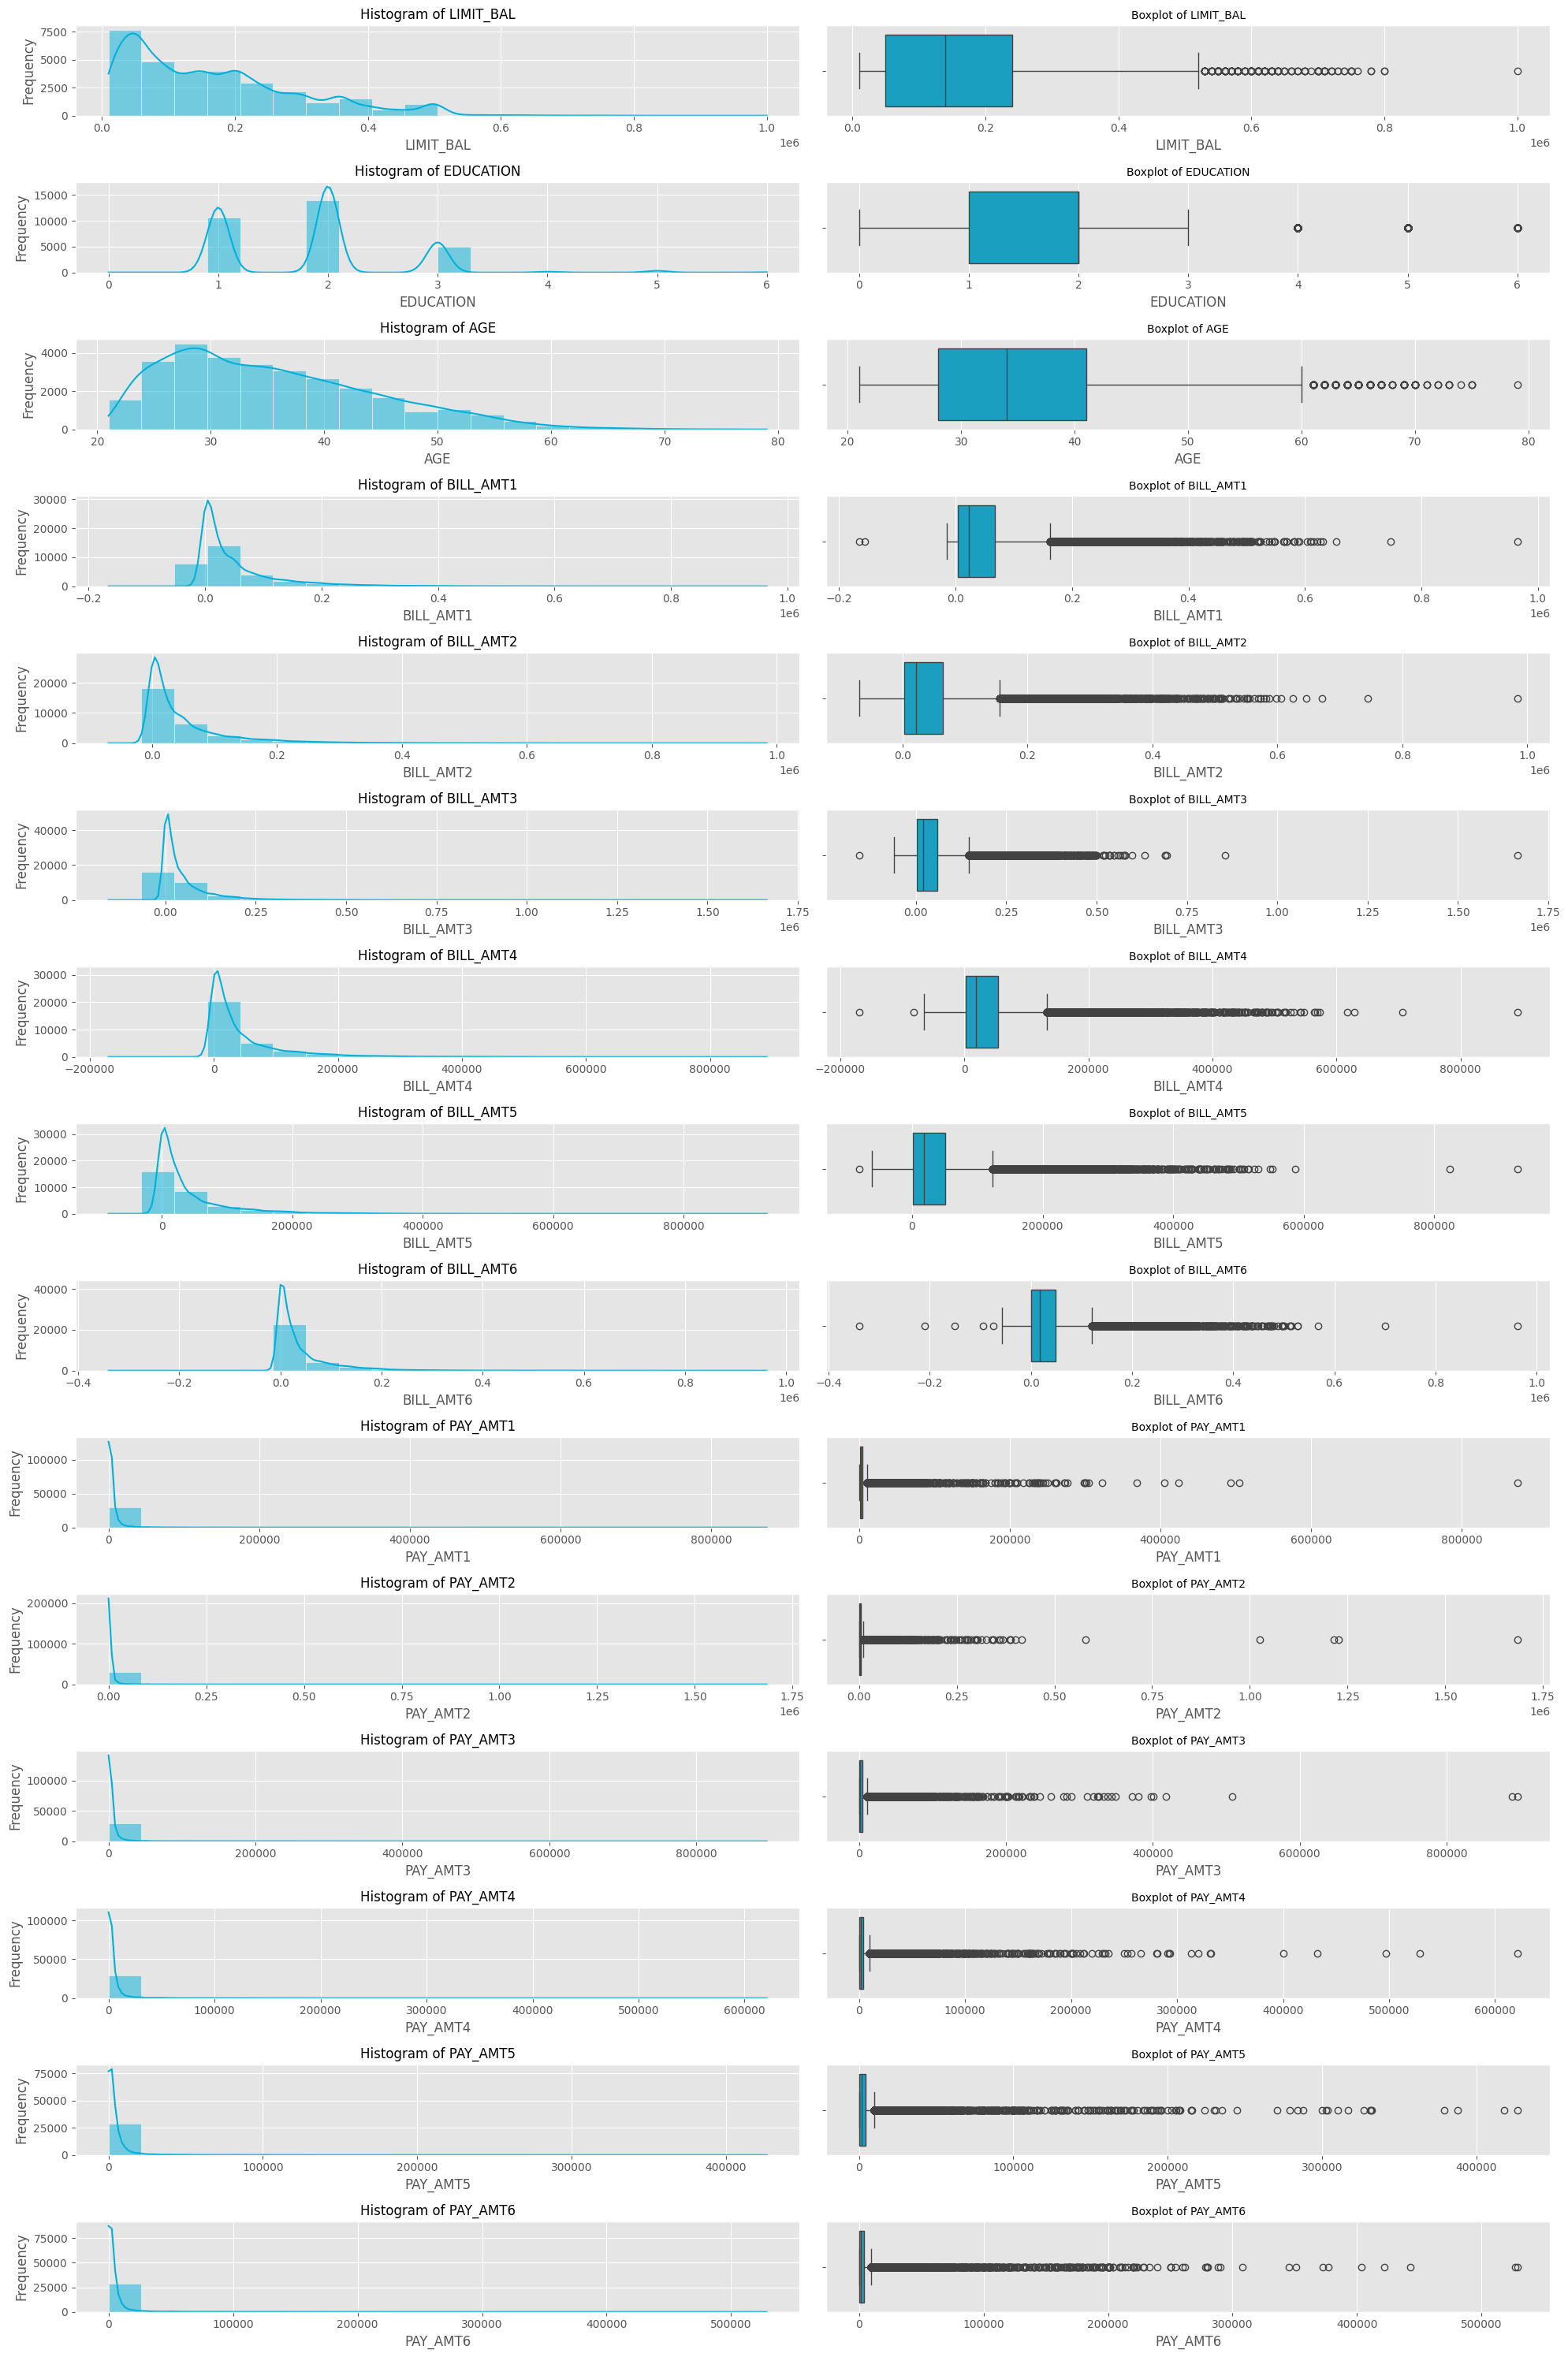

In [16]:
# Creating histogram from numerical variables

plt.figure(figsize=(20, 30))

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(df[col], kde=True, color='#00b0db', bins=20)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=df[col], color='#00b0db')
    plt.title(f'Boxplot of {col}', size=10)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [17]:
# Normal test, skewness and data distribution

from scipy.stats import normaltest

alpha = 0.05
index = 1

dist_info = []
for feature_name in numerical:
    stat, p_value = normaltest(df[feature_name].dropna())
    
    if p_value > alpha:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    skewness = df[feature_name].skew()
    
    if skewness > 0:
        skewness_type = "Right Skew"
    else:
        skewness_type = "Left Skew"
    
    dist_info.append([feature_name, stat, p_value, distribution, skewness, skewness_type])

distribution_info = pd.DataFrame(dist_info, columns=["Feature", 
                                                     "D'Agostino-Pearson Statistic", 
                                                     "P-value", 
                                                     "Distribution", 
                                                     "Skewness",
                                                     "Skewness Type"])
distribution_info

,Feature,D'Agostino-Pearson Statistic,P-value,Distribution,Skewness,Skewness Type
0,LIMIT_BAL,3740.095050,0.0,Not Normally Distributed,0.992867,Right Skew
1,EDUCATION,4845.297497,0.0,Not Normally Distributed,0.970972,Right Skew
2,AGE,2171.703732,0.0,Not Normally Distributed,0.732246,Right Skew
3,BILL_AMT1,17179.222926,0.0,Not Normally Distributed,2.663861,Right Skew
4,BILL_AMT2,17512.384720,0.0,Not Normally Distributed,2.705221,Right Skew
5,BILL_AMT3,21149.928425,0.0,Not Normally Distributed,3.087830,Right Skew
6,BILL_AMT4,18311.848666,0.0,Not Normally Distributed,2.821965,Right Skew
7,BILL_AMT5,18804.753058,0.0,Not Normally Distributed,2.876380,Right Skew
8,BILL_AMT6,18665.007061,0.0,Not Normally Distributed,2.846645,Right Skew
9,PAY_AMT1,57398.088110,0.0,Not Normally Distributed,14.668364,Right Skew


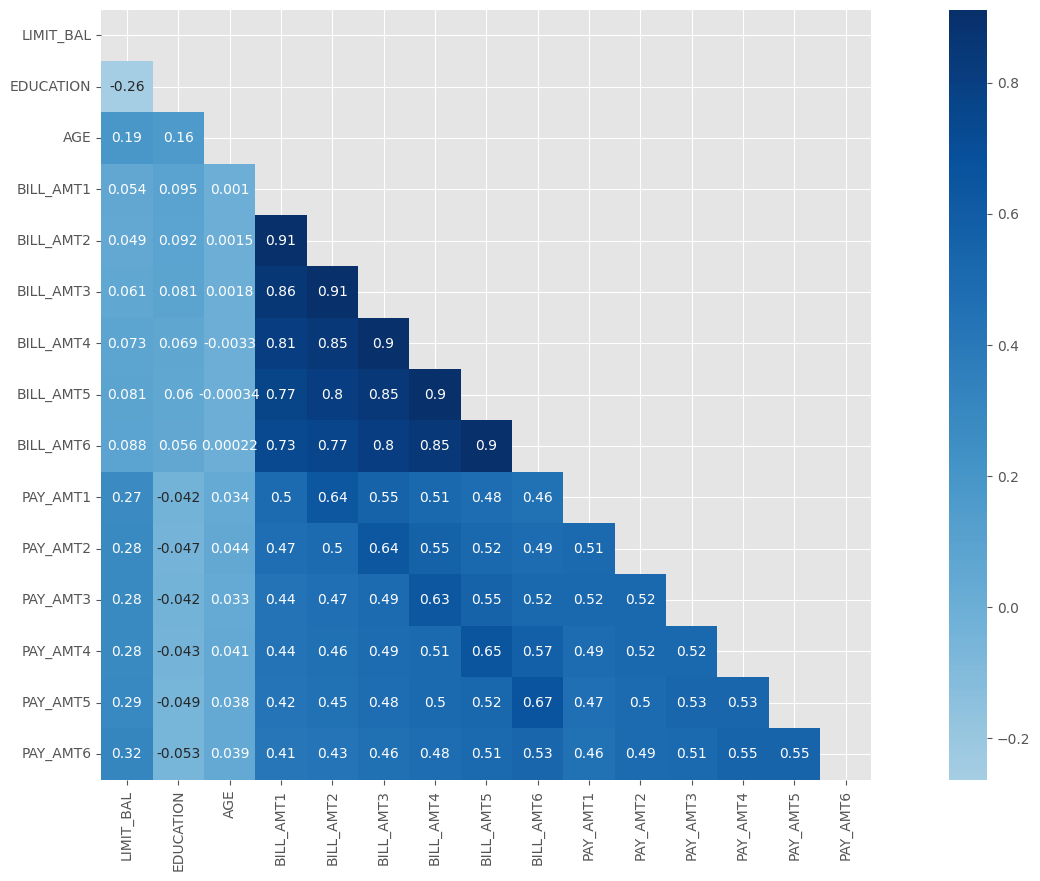

In [18]:
# Correlation between features
plt.figure(figsize=(20, 10))

matrix = np.triu(df[numerical].corr(method='spearman'))

sns.heatmap(data=df[numerical].corr(method='spearman'), annot=True, cmap='Blues', center=0, mask = matrix, square='True')
plt.show()

### **Categorical**

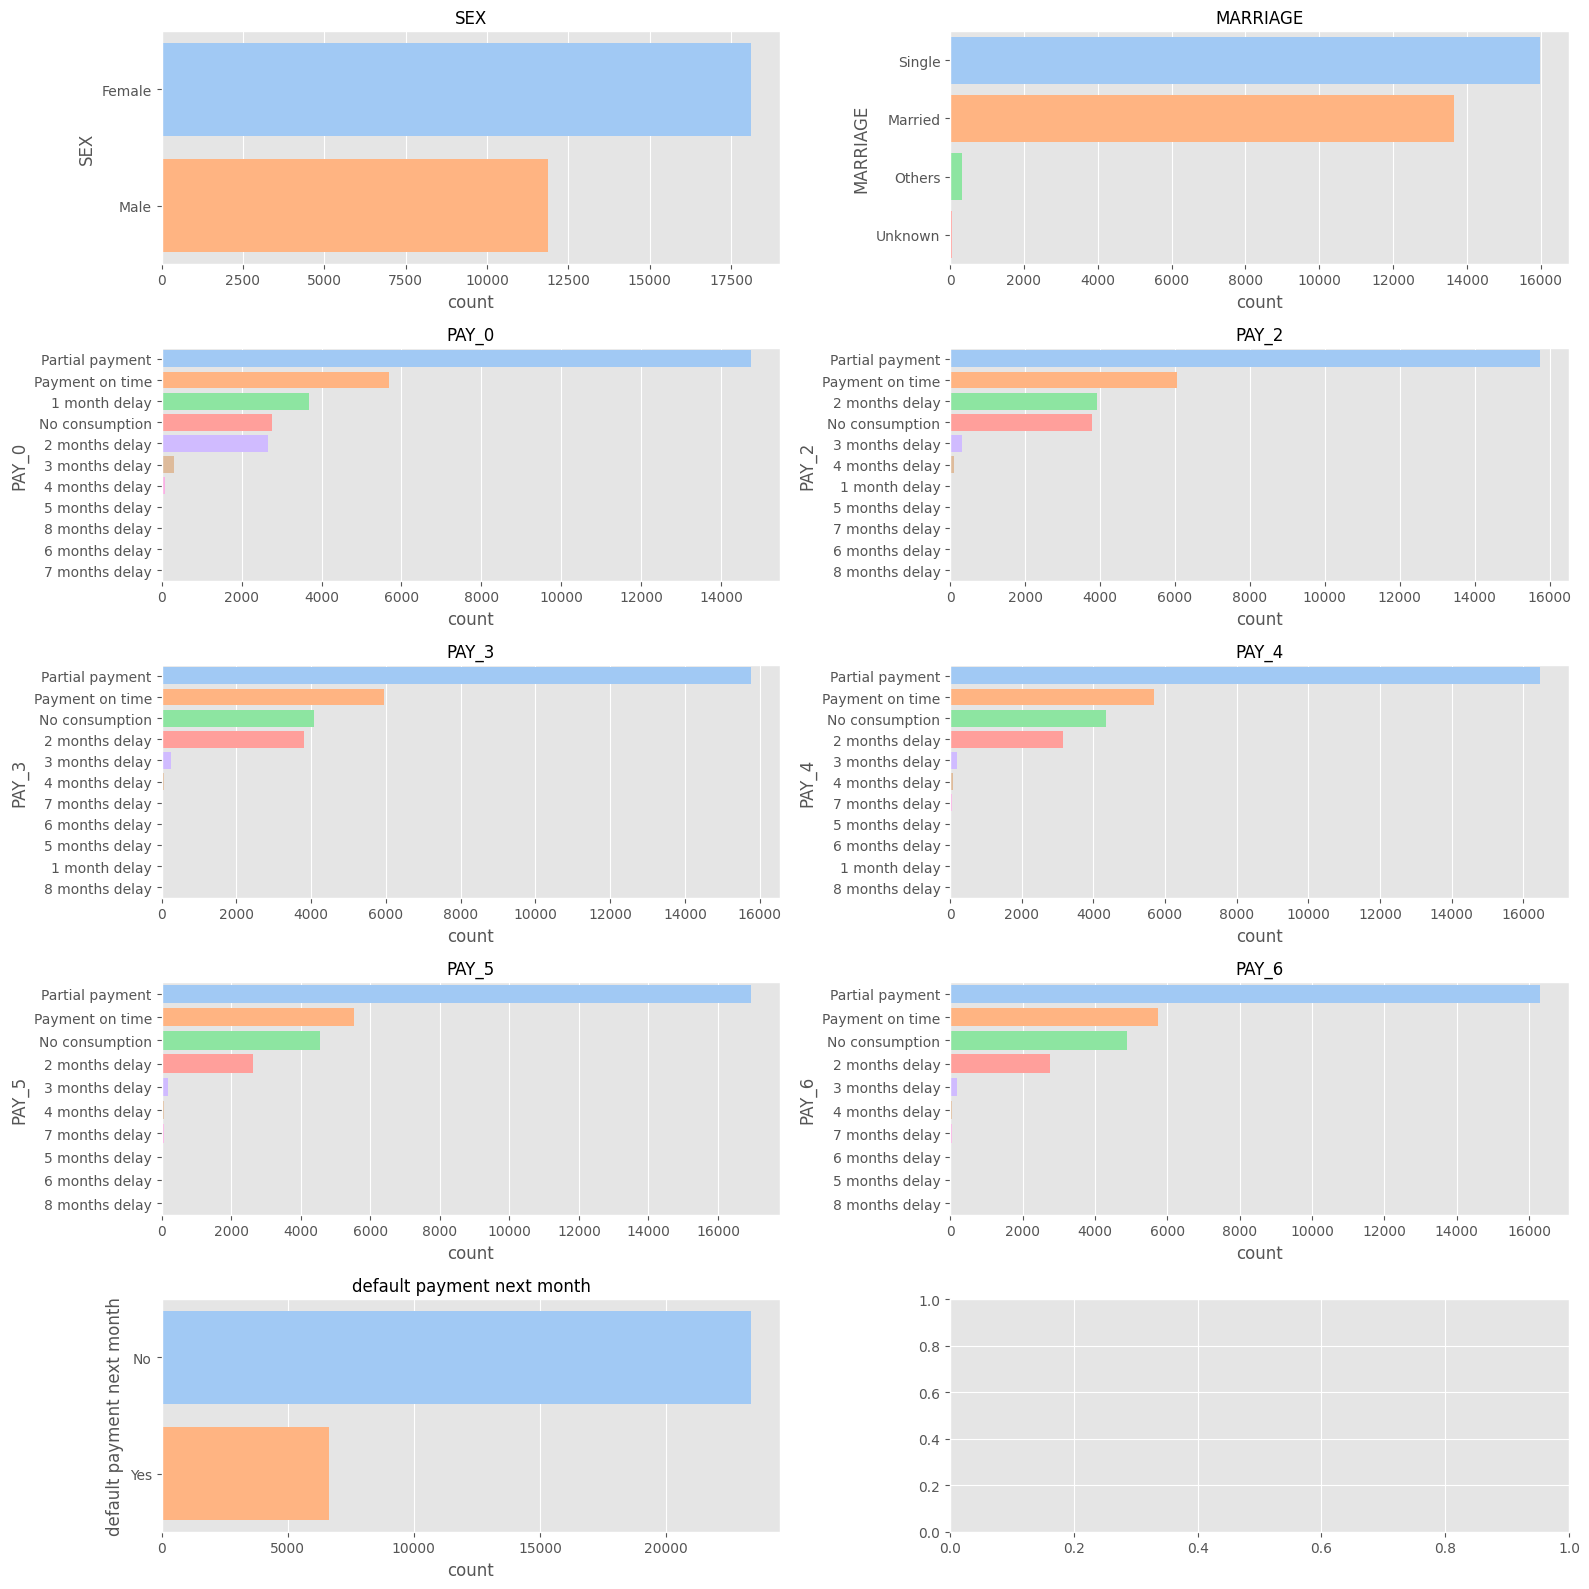

In [19]:
# Categorical features

# Set the color palette
sns.set_palette("pastel")

fig, axes = plt.subplots(5, 2, figsize=(16, 16)) 
for i, j in zip(categorical, axes.flatten()):
    ax = sns.countplot(data=df, y=i, ax=j, order=df[i].value_counts().index)

    # Set different colors for each bar based on the unique categories
    unique_categories = df[i].unique()
    num_categories = len(unique_categories)
    colors = sns.color_palette("pastel", n_colors=num_categories)
    color_mapping = dict(zip(unique_categories, colors))
    
    for category, patch in zip(unique_categories, ax.patches):
        patch.set_facecolor(color_mapping[category])
    
    ax.set_title(f'{i}', size=12)

plt.tight_layout()
plt.show()

## **Data Cleaning**

### **Feature selection**

We have deleted 'ID' columns as it will not be necessary to use it for our machine learning model

In [20]:

print(f'The columns that we will use consist of:{df.columns}')

The columns that we will use consist of:Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


### **Missing values**

In [21]:
# Calculating the percentage of missing values from columns
df_miss_percent = df.isna().sum()* 100/len(df)  
df_miss_percent.to_frame().rename(columns={0:'Percentage of Missing values'})

,Percentage of Missing values
LIMIT_BAL,0.0
SEX,0.0
EDUCATION,0.0
MARRIAGE,0.0
AGE,0.0
PAY_0,0.0
PAY_2,0.0
PAY_3,0.0
PAY_4,0.0
PAY_5,0.0


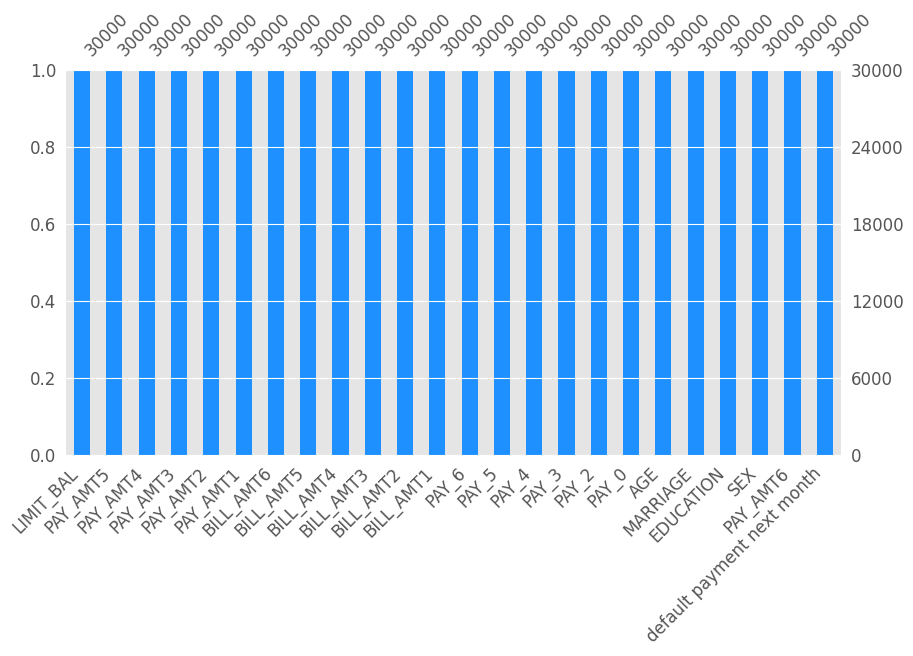

In [22]:
# Visualization of data availaibility to find any missing values
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
plt.show()

No Missing values are present in the dataset

### **Duplicated data**

In [23]:
# Checking for duplicated data
print(f"Total number of duplicated data: {df.duplicated().sum()}")
print(f"Percentage of duplicated data: {df.duplicated().sum()/len(df)*100:.2f}%")

Total number of duplicated data: 35
Percentage of duplicated data: 0.12%


No duplicated data detected on the dataset

### **Outliers**

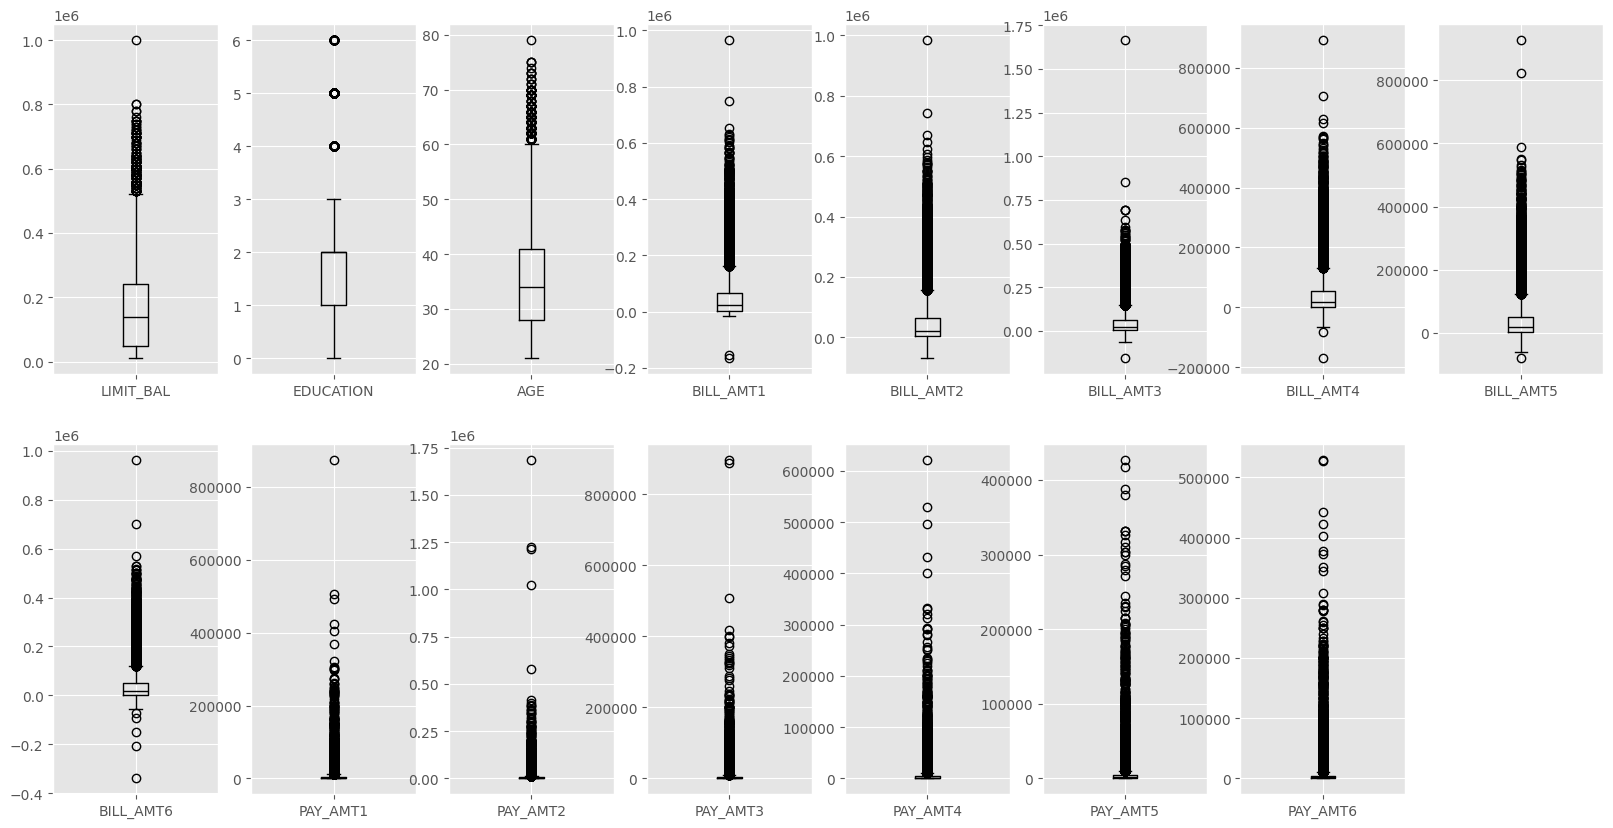

In [24]:
# displaying outliers
df.plot(kind = 'box',
          subplots = True,
          layout = (2,8),
          sharex = False,
          sharey = False,
          figsize = (20, 10),
          color = 'k')
plt.show()

In [25]:
# Calculating outliers and their percentage in features
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

numerical = [var for var in df.columns if df[var].dtypes in ['int64', 'float64'] and var != 'ID']

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(df, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(df[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,LIMIT_BAL,167,0.56,-235000.000,525000.000
1,EDUCATION,454,1.51,-0.500,3.500
2,AGE,272,0.91,8.500,60.500
3,BILL_AMT1,2400,8.00,-91739.625,162389.375
4,BILL_AMT2,2395,7.98,-88547.500,155538.500
5,BILL_AMT3,2469,8.23,-83581.500,146412.500
6,BILL_AMT4,2622,8.74,-75942.125,132774.875
7,BILL_AMT5,2725,9.08,-70878.250,122831.750
8,BILL_AMT6,2693,8.98,-70657.375,121111.625
9,PAY_AMT1,2745,9.15,-5009.000,11015.000


We recognize there are outliers in our features. We decide to handle outliers by using winsorization method in the next chapter.

### **Multicollinearity**

In [26]:
# Multicolinearity check

# Check multicollinearity
def calc_vif(df):
    # Selecting numerical columns
    numerical = [var for var in df.columns if df[var].dtype in ['int64', 'float64'] and var != 'ID']
    
    # Creating a DataFrame for the selected numerical columns
    df_numerical = df[numerical]
    
    vif = pd.DataFrame()
    vif['variable'] = df_numerical.columns
    vif['VIF'] = [variance_inflation_factor(df_numerical.values, i) for i in range(df_numerical.shape[1])]
    vif['Multicollinearity tendency'] = np.where(vif['VIF'] > 4, 'yes', 'no')
    return vif

# Run the VIF calculation and sort the results
vif_df = calc_vif(df).sort_values(by='VIF', ascending=True)

# Display the result
vif_df

,variable,VIF,Multicollinearity tendency
14,PAY_AMT6,1.269616,no
12,PAY_AMT4,1.784101,no
13,PAY_AMT5,1.844508,no
11,PAY_AMT3,1.887752,no
9,PAY_AMT1,1.889008,no
10,PAY_AMT2,2.369544,no
0,LIMIT_BAL,3.313981,no
1,EDUCATION,5.887167,yes
2,AGE,8.346325,yes
3,BILL_AMT1,20.666558,yes


### **Cardinality**

In [27]:
# Reviewing cardinality

# Identifying categorical colums that contains 'object'
eda_categorical = [var for var in df.columns if df[var].dtypes in ['object']]

# creating a function to check cardinality
def check_cardinality(data):
    cardinality_info = []

    for feature in eda_categorical:
        cardinality = len(data[feature].unique())
        warning = "High" if cardinality > 10 else "Low"
        cardinality_info.append({'Feature': feature, 'Cardinality': cardinality, 'Cardinality tendency': warning})

    return pd.DataFrame(cardinality_info)

cardinality_data = check_cardinality(df)
cardinality_data

,Feature,Cardinality,Cardinality tendency
0,SEX,2,Low
1,MARRIAGE,4,Low
2,PAY_0,11,High
3,PAY_2,11,High
4,PAY_3,11,High
5,PAY_4,11,High
6,PAY_5,10,Low
7,PAY_6,10,Low
8,default payment next month,2,Low


### **Imbalance data**

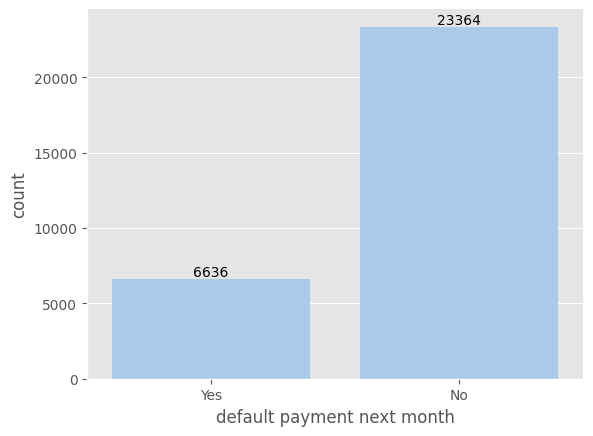

In [28]:
# Imbalance check
ax = sns.countplot(df, x="default payment next month")
for label in ax.containers:
    ax.bar_label(label)
sns.despine()
plt.show()

In [29]:
df['default payment next month'].value_counts(normalize=True).to_frame()

,proportion
default payment next month,
No,0.7788
Yes,0.2212


## **Data Analysis**

### **Feature vs target**

In [30]:
# Statistical descriptive of positive class ('yes')
display(df[df['default payment next month'] == 'Yes'].describe(), df[df['default payment next month'] == 'Yes'].describe(include='O'))

,LIMIT_BAL,EDUCATION,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000
mean,130109.656420,1.894665,35.725738,48509.162297,47283.617842,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068
std,115378.540571,0.728096,9.693438,73782.067220,71651.030364,68516.975738,64351.076092,61424.695949,59579.674268,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894
min,10000.000000,1.000000,21.000000,-6676.000000,-17710.000000,-61506.000000,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,2987.750000,2694.000000,2500.000000,2141.500000,1502.750000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,90000.000000,2.000000,34.000000,20185.000000,20300.500000,19834.500000,19119.500000,18478.500000,18028.500000,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000
75%,200000.000000,2.000000,42.000000,59626.500000,57919.750000,54733.750000,50175.750000,47853.000000,47424.000000,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000
max,740000.000000,6.000000,75.000000,613860.000000,581775.000000,578971.000000,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000


,SEX,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
count,6636,6636,6636,6636,6636,6636,6636,6636,6636
unique,2,4,11,10,11,11,10,10,1
top,Female,Single,Partial payment,Partial payment,Partial payment,Partial payment,Partial payment,Partial payment,Yes
freq,3763,3341,1888,2503,2751,3016,3195,3069,6636


In [31]:
# Statistical descriptive of negative class ('no')
display(df[df['default payment next month'] == 'No'].describe(), df[df['default payment next month'] == 'No'].describe(include='O'))

,LIMIT_BAL,EDUCATION,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000
mean,178099.726074,1.841337,35.417266,51994.227273,49717.435670,4.753337e+04,43611.165254,40530.445343,39042.268704,6307.337357,6.640465e+03,5753.496833,5300.529319,5248.220296,5719.371769
std,131628.359660,0.806780,9.077355,73577.606694,71029.946709,6.957666e+04,64324.796730,60617.268112,59547.015717,18014.508990,2.530226e+04,18684.255937,16689.778060,16071.667860,18792.950473
min,10000.000000,0.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,70000.000000,1.000000,28.000000,3677.250000,3055.000000,2.769750e+03,2360.000000,1823.000000,1265.500000,1163.750000,1.005000e+03,600.000000,390.000000,369.000000,300.000000
50%,150000.000000,2.000000,34.000000,23119.500000,21660.500000,2.020250e+04,19000.000000,17998.000000,16679.000000,2459.500000,2.247500e+03,2000.000000,1734.000000,1765.000000,1706.000000
75%,250000.000000,2.000000,41.000000,69027.000000,65686.000000,6.189400e+04,55988.000000,51135.250000,49842.500000,5606.250000,5.311250e+03,5000.000000,4602.000000,4600.000000,4545.000000
max,1000000.000000,6.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


,SEX,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
count,23364,23364,23364,23364,23364,23364,23364,23364,23364
unique,2,4,11,11,11,11,9,9,1
top,Female,Single,Partial payment,Partial payment,Partial payment,Partial payment,Partial payment,Partial payment,No
freq,14349,12623,12849,13227,13013,13439,13752,13217,23364


### **Numerical features vs target**

In [32]:
# Numerical features vs Target (median values)

# List of numerical columns excluding 'ID' and the target column
numerical = [var for var in df.columns if df[var].dtype in ['int64', 'float64'] and var != 'ID']

# Use groupby to calculate median for each group ('default payment next month') and only for the numerical columns
median_df = df.groupby('default payment next month')[numerical].median().T

median_df

default payment next month,No,Yes
LIMIT_BAL,150000.0,90000.0
EDUCATION,2.0,2.0
AGE,34.0,34.0
BILL_AMT1,23119.5,20185.0
BILL_AMT2,21660.5,20300.5
BILL_AMT3,20202.5,19834.5
BILL_AMT4,19000.0,19119.5
BILL_AMT5,17998.0,18478.5
BILL_AMT6,16679.0,18028.5
PAY_AMT1,2459.5,1636.0


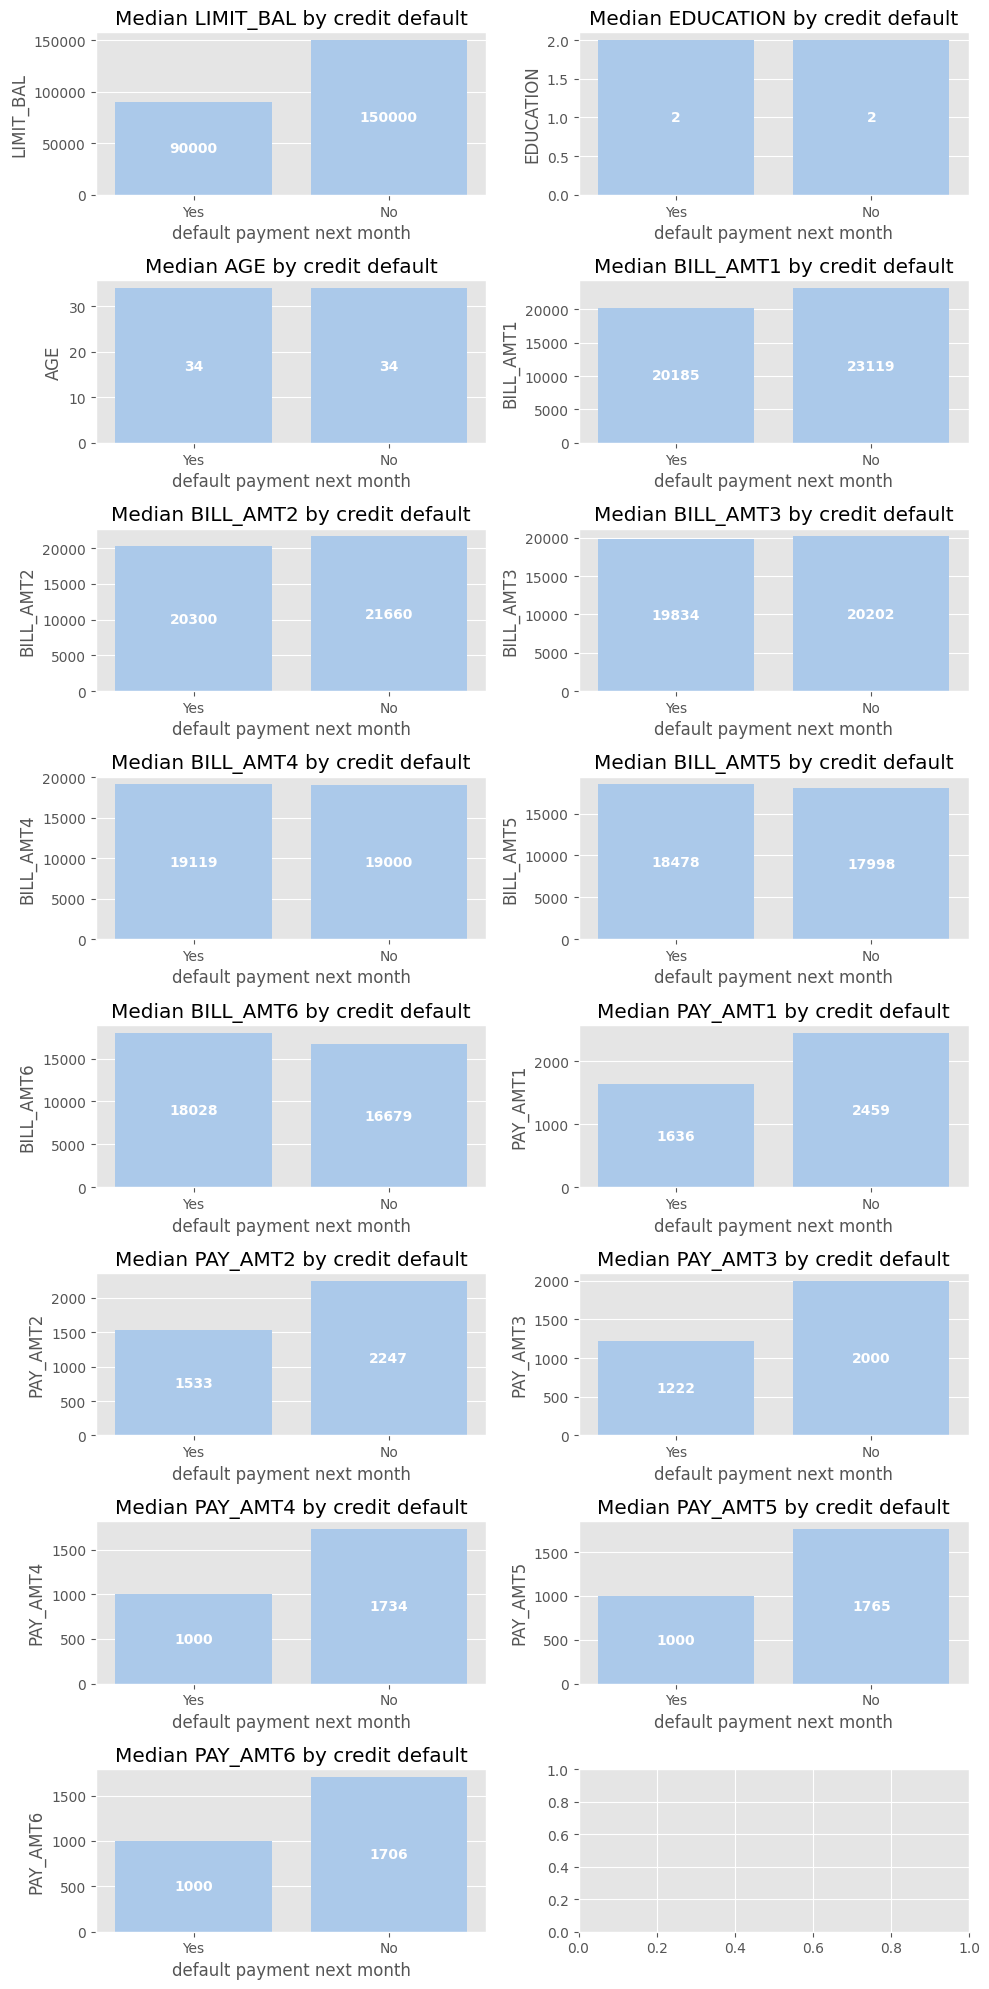

In [33]:
# Numerical features vs Target

# Setting numerical column
numerical = [var for var in df.columns if df[var].dtype in ['int64', 'float64'] and var != 'ID']

# Setting up size of the plot
fig, axes = plt.subplots(8, 2, figsize=(10, 20))

# Loop over each numerical column
for col, ax in zip(numerical, axes.flatten()):
    # Create the barplot
    barplot = sns.barplot(data=df, y=col, x='default payment next month', estimator=np.median, ci=None, ax=ax)
    
    # Add annotations
    for p in barplot.patches:
        value = f'{int(p.get_height())}'  # Convert height to integer and string
        ax.annotate(value,
                    (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                    ha='center', va='center',
                    color='white', fontsize=10, fontweight='bold')
    
    ax.set_title(f'Median {col} by credit default')

plt.tight_layout()
plt.show()


**Insights of numerical features vs target**

Based on the provided table, here are some insights into the relationship between the numerical features and the target variable 'default payment next month':

1. Credit Limit (LIMIT_BAL)
* Median for 'No' Default: 150,000.0
* Median for 'Yes' Default: 90,000.0
* Insight: Customers who did not default have a significantly higher median credit limit compared to those who did default. This suggests that customers with higher credit limits are less likely to default, possibly due to better financial standing or creditworthiness.

2. Education Level (EDUCATION)
* Median for Both Groups: 2.0
* Insight: The median education level is the same for both groups, indicating that education level (on a median basis) does not differentiate between customers who default and those who do not. Further analysis might be needed to see if specific education levels have different default rates.

3. Age
* Median for Both Groups: 34.0
* Insight: The median age is identical for both groups, suggesting that age, at least at the median, is not a distinguishing factor in defaulting on payments. Age distribution or segmentation might provide more insights beyond the median.

4. Bill Amounts (BILL_AMT1 to BILL_AMT6)
Early Months (BILL_AMT1 to BILL_AMT3):

* Customers who did not default have slightly higher median bill amounts.
    * BILL_AMT1 Median 'No': 23,119.5
    * BILL_AMT1 Median 'Yes': 20,185.0

Later Months (BILL_AMT4 to BILL_AMT6):

* Customers who defaulted have slightly higher median bill amounts.
    * BILL_AMT6 Median 'No': 16,679.0
    * BILL_AMT6 Median 'Yes': 18,028.5
* Insight: Initially, non-defaulting customers have higher bill amounts, but over time, the bill amounts for defaulting customers surpass those of non-defaulting ones. This shift might indicate accumulating unpaid bills among those who eventually default.

5. Payment Amounts (PAY_AMT1 to PAY_AMT6)
* Consistently Higher Payments for Non-Defaulters:
    * PAY_AMT1 Median 'No': 2,459.5
    * PAY_AMT1 Median 'Yes': 1,636.0
    * PAY_AMT6 Median 'No': 1,706.0
    * PAY_AMT6 Median 'Yes': 1,000.0
* Insight: Customers who did not default made higher median payments across all months compared to those who defaulted. The lower payment amounts among defaulters suggest difficulty in meeting payment obligations, which could be a strong predictor of default risk.

**Overall Observations**:

* Credit Limit and Default Risk: Higher credit limits are associated with a lower likelihood of default. This could be due to higher-income customers receiving larger credit limits and having more capacity to repay debts.

* Payment Behavior: The most significant difference between the two groups is in the payment amounts. Non-defaulters consistently make higher payments, indicating better repayment behavior.

* Bill Amount Trends: The increase in median bill amounts for defaulters over time may reflect accumulating debt, possibly due to missed payments or over-reliance on credit.

* Education and Age: Since the medians are the same for both groups, these factors may not be significant indicators of default risk on their own. However, other statistical measures (like variance or distribution) might reveal more.

### **Categorical features vs target**

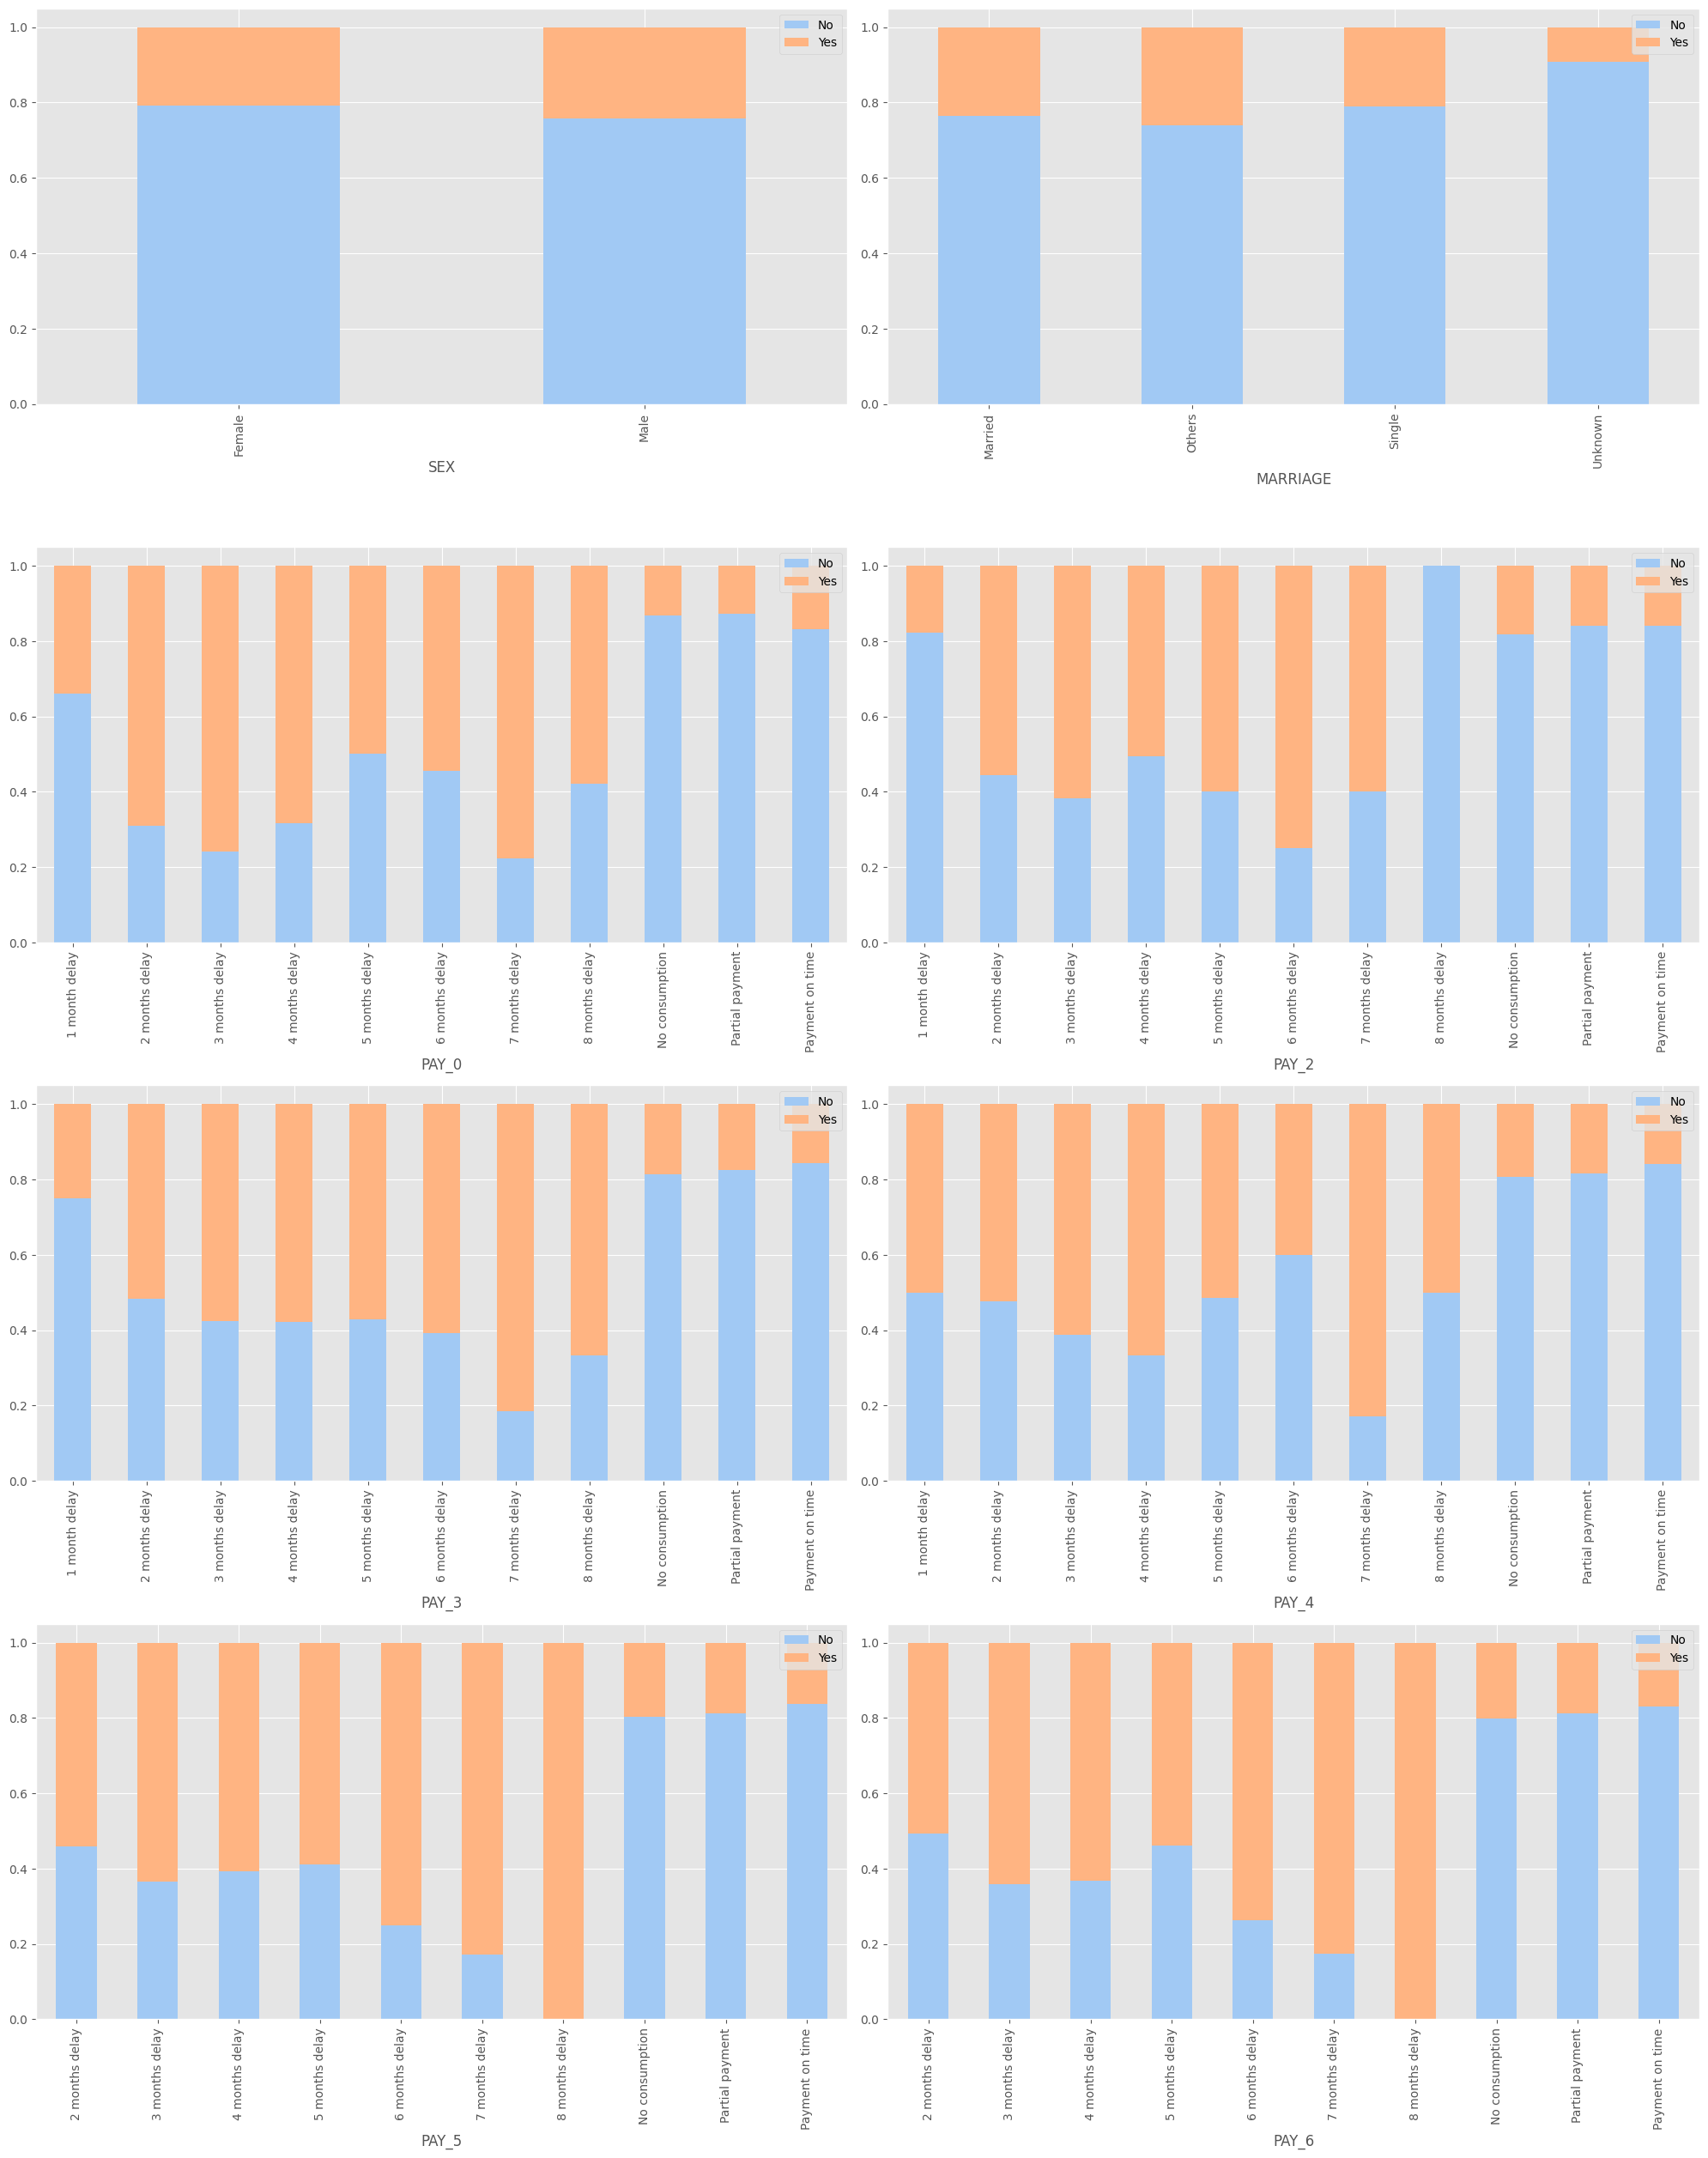

In [34]:
# Categorical features vs target

# Categorical
categorical = [var for var in df.drop(columns=['default payment next month']).columns if df[var].dtypes in ['object']]

# Visualizing claim proportion of categorical features
count = 0
fig = plt.figure(figsize=(20,30))

for i in df[categorical].columns:
    count += 1
    ax = plt.subplot(5, 2, count)
    pd.crosstab(df[i], df['default payment next month'], normalize=0).plot(kind='bar', stacked=True, ax=ax)
    ax.legend(loc='upper right')  # Position the legend in the upper right corner
    fig.tight_layout()

plt.show()

In [35]:
# Creating function for plotting categorical features
def create_plot(data, col, x_maks=1000):

    agg_table = data.groupby([col, 'default payment next month']).size().unstack().reset_index()
    agg_table['total'] = agg_table['Yes']+agg_table['No']
    agg_table['% Yes'] = (agg_table['Yes']/agg_table['total']*100).round(2)
    agg_table = agg_table.sort_values(by='% Yes', ascending=False)
    agg_table

    fig, axes = plt.subplots(1, 2, figsize=(16,5))

    ax1 = sns.barplot(data=agg_table, y=col, x='% Yes', ax=axes[0])
    label = ['{:.1f} %'.format(x) for x in ax1.containers[0].datavalues]
    ax1.bar_label(ax1.containers[0], labels=label, padding=3, label_type='center')
    ax1.set_title(f'Percentage of credit card default payment by {col}')

    ax2 = sns.countplot(data=df, y=col, hue='default payment next month', order=agg_table[col], ax=axes[1])
    ax2.set_title(f'Number of credit card default payment according to {col}')
    for container in ax2.containers:
        ax2.bar_label(container)
    ax2.set_xlim(0, x_maks)

    plt.tight_layout()
    plt.show()

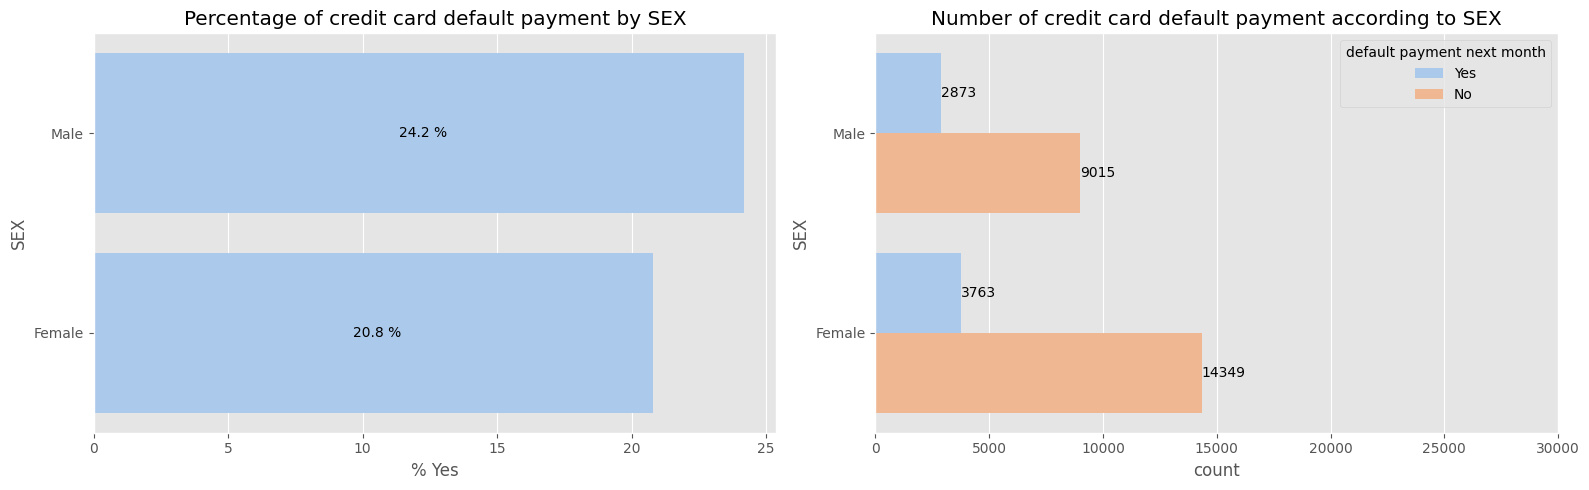

In [36]:
# Percentage and number of credit card default payment by 'SEX'
create_plot(df, 'SEX', x_maks=30000)

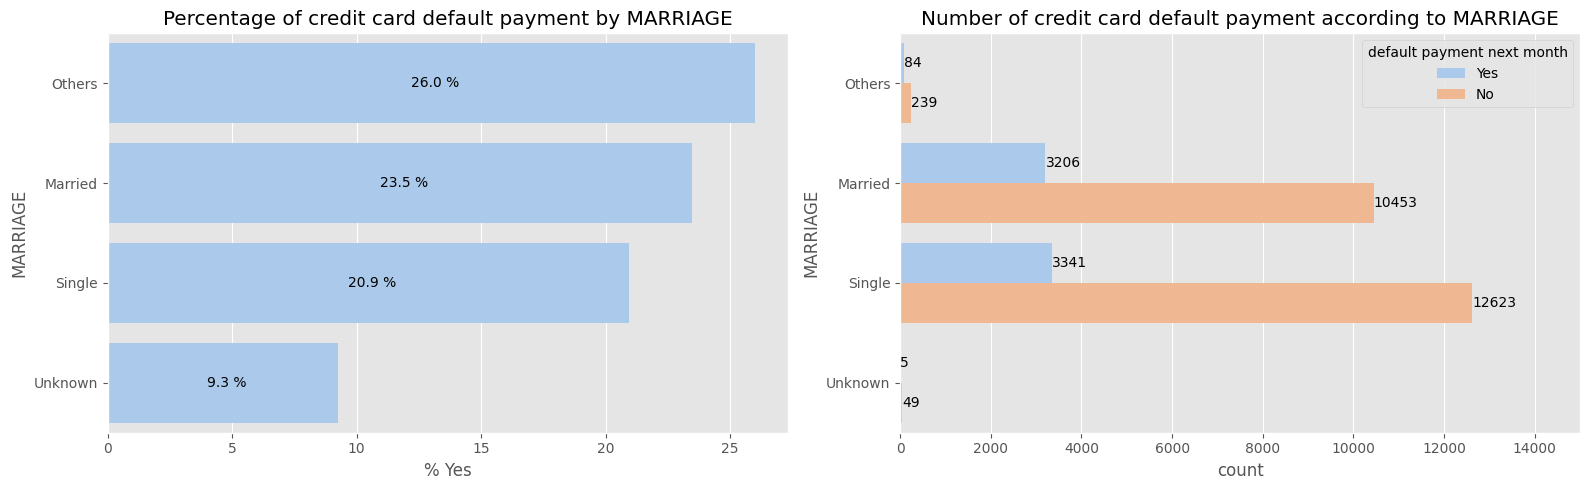

In [37]:
# Percentage and number of credit card default payment by 'MARRIAGE'
create_plot(df, 'MARRIAGE', x_maks=15000)

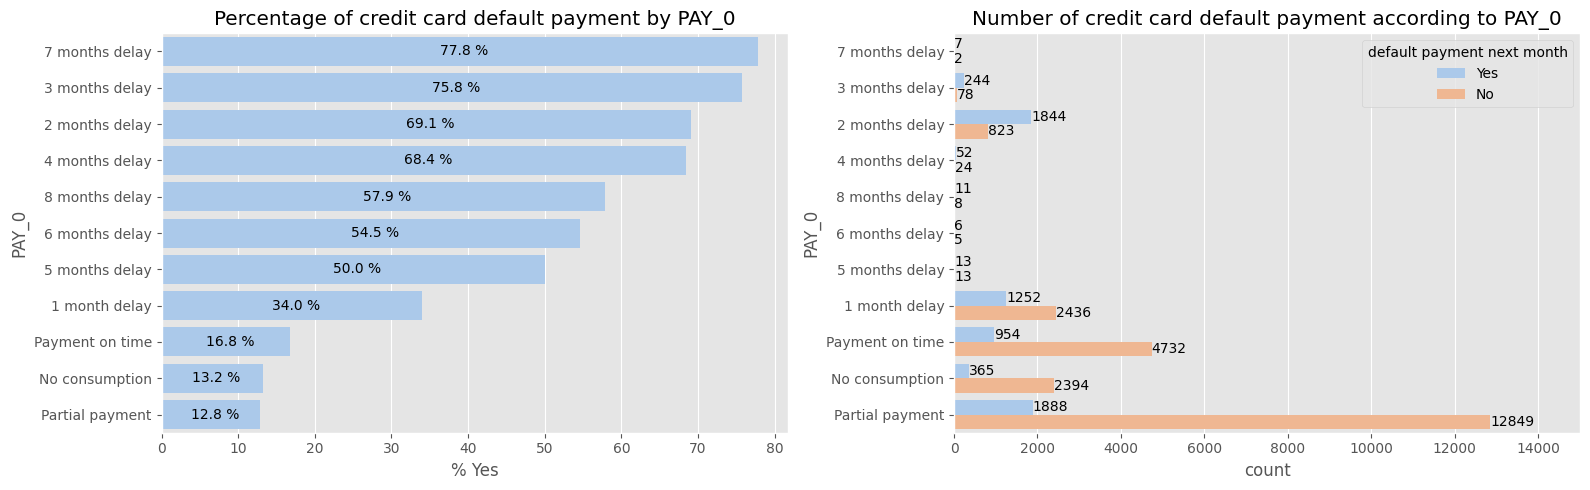

In [38]:
# Percentage and number of credit card default payment by 'PAY_0' or 'partial payment'
create_plot(df, 'PAY_0', x_maks=15000)

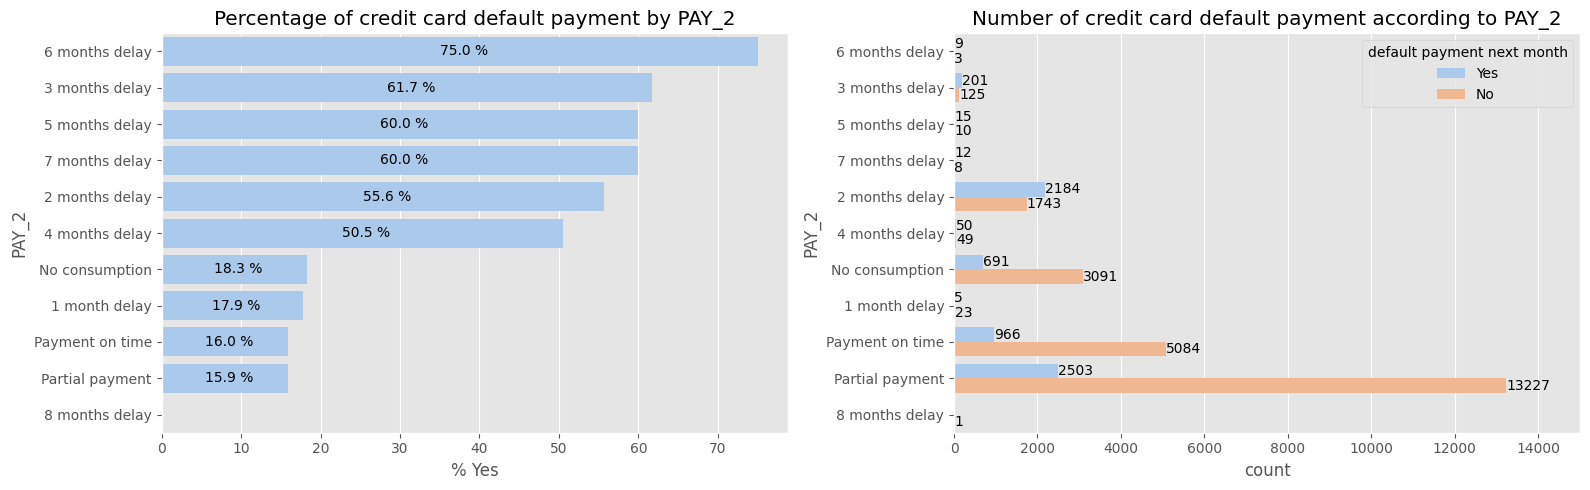

In [39]:
# Percentage and number of credit card default payment by 'PAY_2' or '2 months delay creditor'
create_plot(df, 'PAY_2', x_maks=15000)

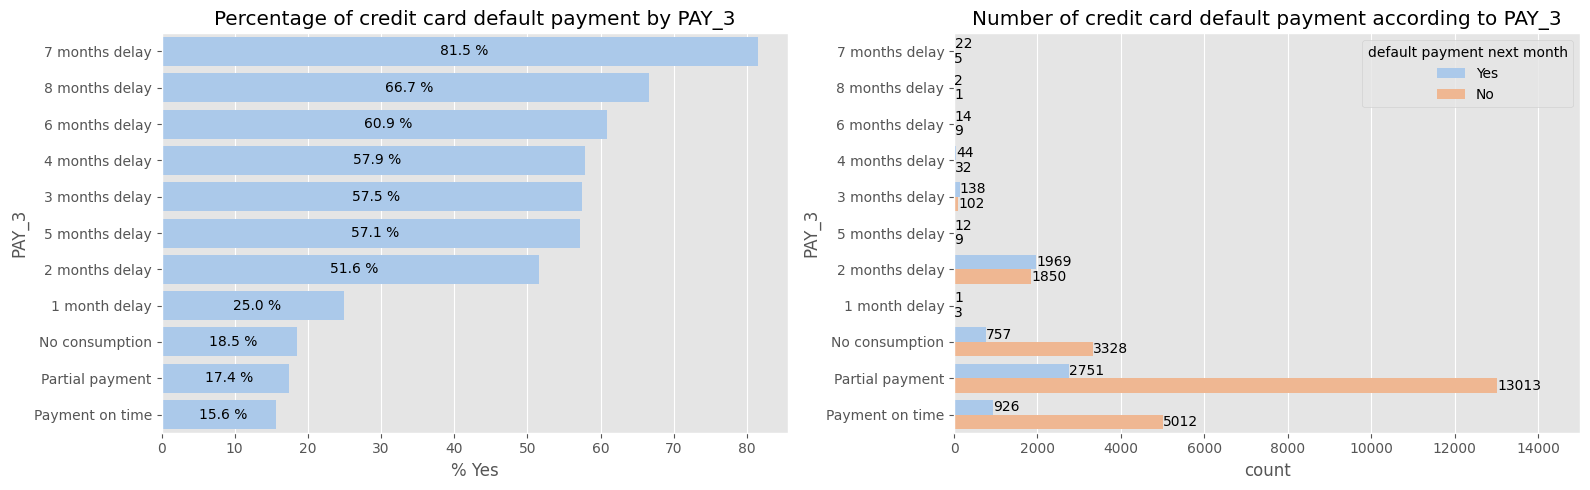

In [40]:
# Percentage and number of credit card default payment by 'PAY_3' or '3 months delay creditor'
create_plot(df, 'PAY_3', x_maks=15000)

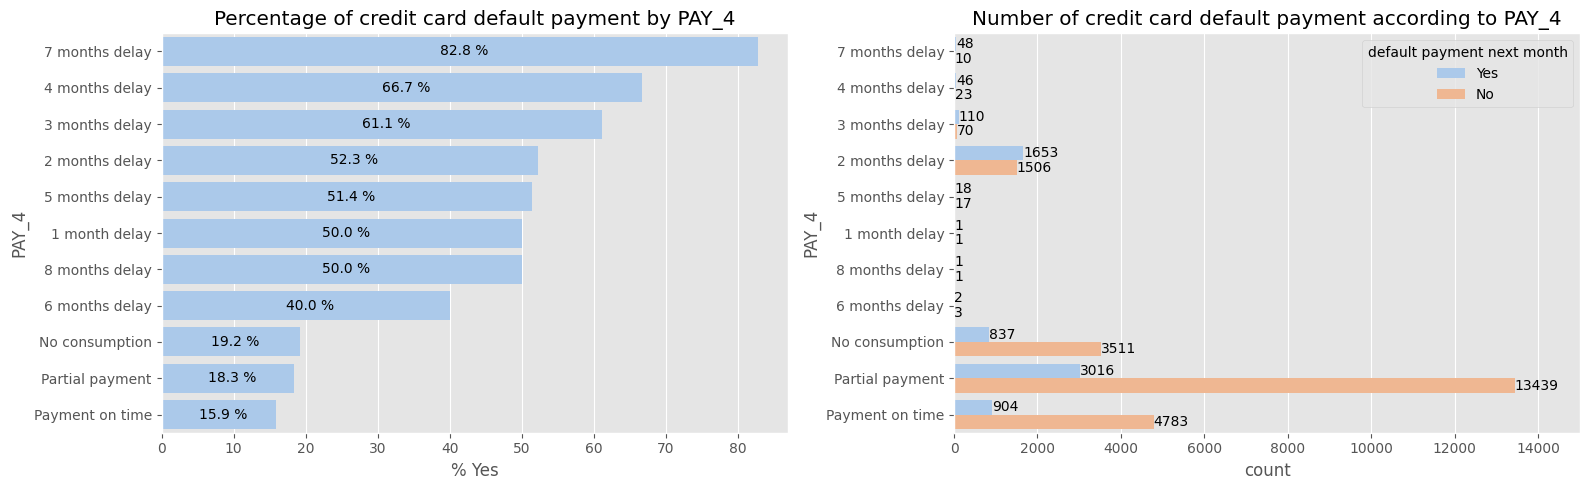

In [41]:
# Percentage and number of credit card default payment by 'PAY_4' or '4 months delay creditor'
create_plot(df, 'PAY_4', x_maks=15000)

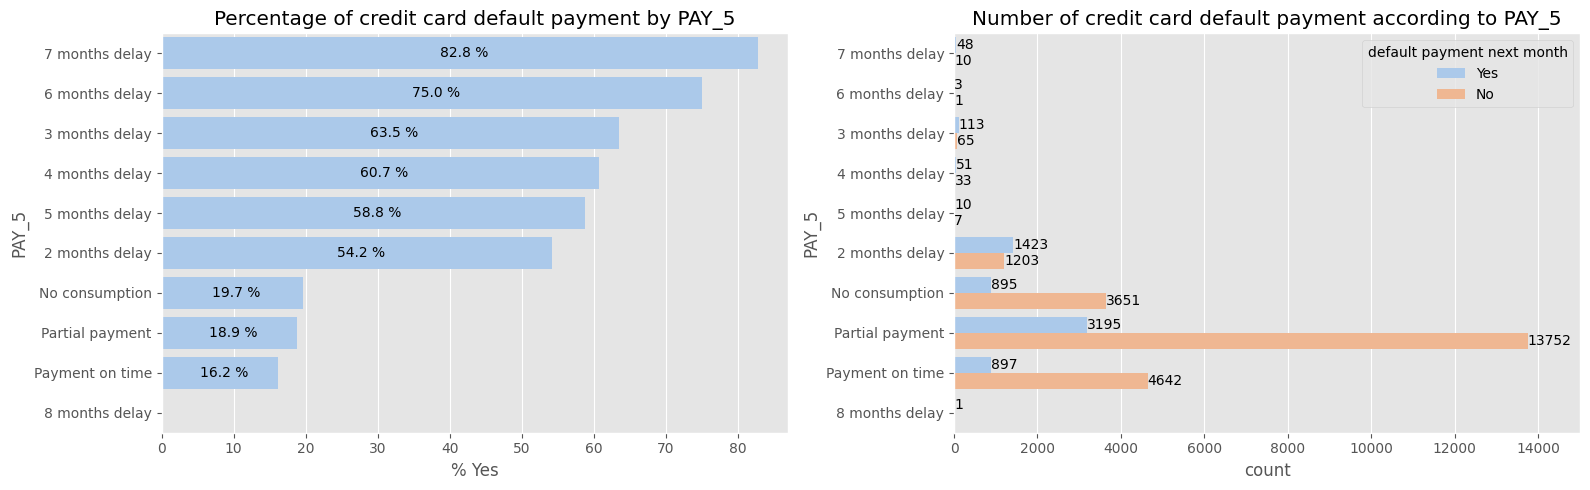

In [42]:
# Percentage and number of credit card default payment by 'PAY_5' or '5 months delay creditor'
create_plot(df, 'PAY_5', x_maks=15000)

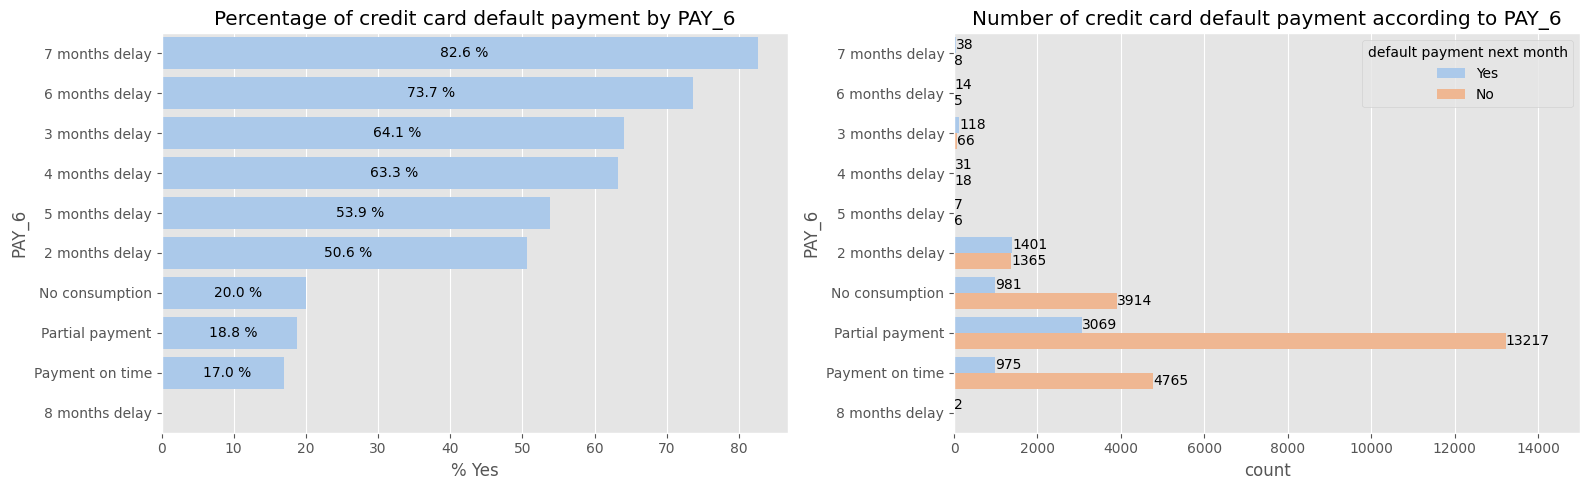

In [43]:
# Percentage and number of credit card default payment by 'PAY_6' or '6 months delay creditor'
create_plot(df, 'PAY_6', x_maks=15000)

In [44]:
# Table of categorical features vs target ('default payment next month')

# List of categorical columns
categorical = [var for var in df.drop(columns=['default payment next month']).columns if df[var].dtypes == 'object']

for col in categorical:
    # Group by categorical column and 'default payment next month', calculate the normalized value counts
    categorical_default_credit = df.groupby([col, 'default payment next month']).size() / df.groupby(col).size()
    
    # Unstack the second level of the index (default payment next month)
    categorical_default_credit = categorical_default_credit.unstack(fill_value=0)
    
    # Display sorted values based on the 'Yes' column
    display(categorical_default_credit.sort_values(by=['Yes'], ascending=False))


default payment next month,No,Yes
SEX,,
Male,0.758328,0.241672
Female,0.792237,0.207763


default payment next month,No,Yes
MARRIAGE,,
Others,0.739938,0.260062
Married,0.765283,0.234717
Single,0.790717,0.209283
Unknown,0.907407,0.092593


default payment next month,No,Yes
PAY_0,,
7 months delay,0.222222,0.777778
3 months delay,0.242236,0.757764
2 months delay,0.308586,0.691414
4 months delay,0.315789,0.684211
8 months delay,0.421053,0.578947
6 months delay,0.454545,0.545455
5 months delay,0.500000,0.500000
1 month delay,0.660521,0.339479
Payment on time,0.832219,0.167781


default payment next month,No,Yes
PAY_2,,
6 months delay,0.250000,0.750000
3 months delay,0.383436,0.616564
5 months delay,0.400000,0.600000
7 months delay,0.400000,0.600000
2 months delay,0.443850,0.556150
4 months delay,0.494949,0.505051
No consumption,0.817292,0.182708
1 month delay,0.821429,0.178571
Payment on time,0.840331,0.159669


default payment next month,No,Yes
PAY_3,,
7 months delay,0.185185,0.814815
8 months delay,0.333333,0.666667
6 months delay,0.391304,0.608696
4 months delay,0.421053,0.578947
3 months delay,0.425000,0.575000
5 months delay,0.428571,0.571429
2 months delay,0.484420,0.515580
1 month delay,0.750000,0.250000
No consumption,0.814688,0.185312


default payment next month,No,Yes
PAY_4,,
7 months delay,0.172414,0.827586
4 months delay,0.333333,0.666667
3 months delay,0.388889,0.611111
2 months delay,0.476733,0.523267
5 months delay,0.485714,0.514286
1 month delay,0.500000,0.500000
8 months delay,0.500000,0.500000
6 months delay,0.600000,0.400000
No consumption,0.807498,0.192502


default payment next month,No,Yes
PAY_5,,
8 months delay,0.000000,1.000000
7 months delay,0.172414,0.827586
6 months delay,0.250000,0.750000
3 months delay,0.365169,0.634831
4 months delay,0.392857,0.607143
5 months delay,0.411765,0.588235
2 months delay,0.458111,0.541889
No consumption,0.803124,0.196876
Partial payment,0.811471,0.188529


default payment next month,No,Yes
PAY_6,,
8 months delay,0.000000,1.000000
7 months delay,0.173913,0.826087
6 months delay,0.263158,0.736842
3 months delay,0.358696,0.641304
4 months delay,0.367347,0.632653
5 months delay,0.461538,0.538462
2 months delay,0.493492,0.506508
No consumption,0.799591,0.200409
Partial payment,0.811556,0.188444


**Insights of categorical features**

There some insights based on the above graphs:
* SEX: Males are slightly more likely to default compared to females, as their default rate is around 24%, compared to females at 21%.
* MARRIAGE: Individuals in the "Others" category (likely divorced, separated, or cohabitating) have the highest default rate. Married individuals show a moderate risk, while singles have a slightly lower risk of default. The "Unknown" category has the lowest default rate.
* PAY_0 (September 2005 repayment status): The longer the delay in payment, the higher the likelihood of default. Those with severe delays (3 or more months) have very high default rates.
* PAY_2 (August 2005 repayment status): Similar to PAY_0, those with longer delays have a higher chance of defaulting.
* PAY_3 (July 2005 repayment status): Again, the pattern continues—more months of delay lead to a higher default rate.
* PAY_5 (May 2005 repayment status): As with previous PAY variables, delays of 7+ months are very predictive of default.
* PAY_6 (April 2005 repayment status): This follows the same pattern—longer delays strongly correlate with defaults.

Overall insights:
* Gender and Marital Status: Males and individuals in the "Others" category have higher default rates, while single individuals and females are less likely to default.
* Repayment Delays: The longer the payment is delayed (across multiple months), the higher the likelihood of default. Severe delays (6+ months) are the strongest predictors of default.
* No Consumption/Partial Payment: These categories show much lower default rates, indicating more stable financial behavior.

## **Modelling**

In [45]:
# Copy
credit_data = credit_score_data.copy()

In [46]:
# Re-checking missing value from every columns
pd.DataFrame({'Missing values': [credit_data[col].isna().sum() for col in credit_data.columns]}, index=credit_data.columns.values)

,Missing values
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0


In [47]:
# Checking data dimension
credit_data.shape

(30000, 24)

### **Replacing values**

Now we want to replace the content of target column or credit_data['default payment next month']  from 'Yes' and 'No' into 1 and 0. Because our main focus is the customer with default payment next month, so the target should be as

Target :

0 : Customer without default payment next month ('default payment next month' == 'No')

1 : Customer with default payment next month ('default payment next month' == 'Yes')

In [48]:
credit_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### **Define features and target**

In [49]:
# Define features 
X = credit_data.drop(columns='default payment next month')
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [50]:
# Define target
y = credit_data['default payment next month']
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64

### **Data splitting**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1234, stratify=y
)

### **Feature engineering**

**Outlier handling**

We use winsorizing method for handling outliers. This method works by limiting extreme values to reduce their impact. So, the method replaces extreme values with the nearest values that are not considered outliers, thereby reducing the influence of these extremes on statistical analyses.

In [52]:
# Defining winsorizing method
def winsorize_with_pandas(s, limits):
    return s.clip(lower=s.quantile(limits[0]), 
                  upper=s.quantile(1-limits[1]))



In [53]:
from sklearn.base import BaseEstimator, TransformerMixin

class handling_outliers(BaseEstimator, TransformerMixin):
    def __init__(self, limits=(0.01, 0.01)):
        self.limits = limits
        self.cols_to_winsorize = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 
                                   'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 
                                   'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
                                   'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 
                                   'PAY_AMT6']
        self.lower_bounds_ = None
        self.upper_bounds_ = None

    def fit(self, X, y=None):
        # Calculate quantiles for the limits
        self.lower_bounds_ = X[self.cols_to_winsorize].quantile(self.limits[0])
        self.upper_bounds_ = X[self.cols_to_winsorize].quantile(1 - self.limits[1])
        print("Lower Bounds:\n", self.lower_bounds_)
        print("Upper Bounds:\n", self.upper_bounds_)
        return self  

    def transform(self, X, y=None):
        credit_data = X.copy()
        for col in self.cols_to_winsorize:
            credit_data[col] = credit_data[col].clip(lower=self.lower_bounds_[col], upper=self.upper_bounds_[col])
        return credit_data


In [54]:
# Column Transformer
#transformer = ColumnTransformer([('onehot', OneHotEncoder(drop='first'), ['SEX', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']),('ordinal', OrdinalEncoder(), ['EDUCATION'])], remainder='passthrough')

In [55]:
# Column Transformer
#transformer = ColumnTransformer([('onehot', OneHotEncoder(drop='first',sparse_output=False), ['SEX', 'MARRIAGE', 'EDUCATION', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']),], remainder='passthrough')

In [56]:
#('binary', BinaryEncoder(), ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']),

In [57]:
# Column Transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['MARRIAGE', 'EDUCATION']),
    ('binary', BinaryEncoder(), ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
], remainder='passthrough')

**Resampling**

In [58]:
# Resampling

# Defining SMOTE
smote = SMOTE(random_state=0)

# Defining SMOTENC
#smotenc = SMOTENC(random_state=0, categorical_features=[2, 3, 5, 6, 7, 8, 9, 10]) # ['EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

**Scaling**

In [59]:
# Scaling
scaler = RobustScaler()
#scaler = RobustScaler()
#scaler = MinMaxScaler()
#scaler = StandardScaler()

In [60]:
# Pipeline
Pipeline([
    ('outlier', handling_outliers()),
    ('transformer', transformer),
    ('scaler', scaler),
    ('resamplers', smote)
])

Pipeline(steps=[('outlier', handling_outliers()),
                ('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MARRIAGE', 'EDUCATION']),
                                                 ('binary', BinaryEncoder(),
                                                  ['PAY_0', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5',
                                                   'PAY_6'])])),
                ('scaler', RobustScaler()),
                ('resamplers', SMOTE(random_state=0))])

In [61]:
X_train.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [62]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
7187,20000,1,2,2,25,1,2,2,2,2,0,19242,20339,19707,20899,20450,20197,1700,0,1800,0,1000,900
4789,20000,2,2,2,35,1,3,2,0,0,0,20971,20360,19583,19575,16624,0,0,0,392,332,0,0
27298,50000,1,1,2,32,0,0,2,3,2,2,15068,18303,20107,19496,18885,20581,3500,2400,0,0,2000,0
28136,50000,2,3,1,44,0,0,0,0,0,0,46363,47356,48905,49794,8820,9000,1762,2311,2200,176,180,9769
29616,280000,1,3,1,45,-2,-2,-2,-2,-2,-2,14493,1589,-7,1420,8036,12863,1596,0,1427,8076,12927,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13024,240000,2,2,1,48,-2,-2,-2,-2,-2,-2,-5,-5,1056,-4,950,158,0,1061,0,954,158,1796
19534,100000,2,3,1,43,0,0,0,0,0,0,5719,6633,3461,4471,4560,4656,1043,1064,1074,163,169,169
5257,80000,2,3,2,25,-1,-1,-1,-1,-1,-1,571,3948,4695,390,1289,935,3952,4695,390,1289,935,390
2621,210000,2,1,2,39,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
y_train

7187     0
4789     0
27298    1
28136    0
29616    0
        ..
13024    1
19534    0
5257     0
2621     0
14906    0
Name: default payment next month, Length: 21000, dtype: int64

**Cross Validation**

In [64]:
# Cross validation
# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

### **Model Benchmarking**

In [65]:
# Machine Learning Algorithmic models
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
grad = GradientBoostingClassifier(random_state=0)
cat = CatBoostClassifier(verbose=False,random_state=0)
xgb = XGBClassifier(random_state=0)
lgbm = LGBMClassifier(random_state=0)

In [66]:
# Model benchmarking

# Models selection
models = [logreg, knn, dtree, rf, ada, grad, cat, xgb, lgbm]

roc_auc_mean_with_smote = []
roc_auc_std_with_smote = []


for model in  models :

    # modeling with resampling - smote
    pipe_model_with_smote = Pipeline([
        ('outlier', handling_outliers()),
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', smote),
        ('algo', model)
    ])

    model_cv_with_smote = cross_val_score(
        estimator = pipe_model_with_smote,
        X = X_train,
        y = y_train,
        cv = skf,
        scoring = 'roc_auc',
        n_jobs = -1
    )
    roc_auc_mean_with_smote.append(model_cv_with_smote.mean())
    roc_auc_std_with_smote.append(model_cv_with_smote.std())

In [67]:
pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
    'mean_roc_auc_with_smote' : roc_auc_mean_with_smote,
    'std_roc_auc_with_smote' : roc_auc_std_with_smote,
}).sort_values('mean_roc_auc_with_smote', ascending=False)

,model,mean_roc_auc_with_smote,std_roc_auc_with_smote
8,LightGBM,0.771782,0.006548
6,CatBoost,0.771772,0.003050
5,GradienBoost,0.769046,0.006166
3,Random Forest,0.763342,0.005991
4,AdaBoost,0.754480,0.007284
7,XGBoost,0.753212,0.005195
0,Logistic Regression,0.727399,0.009339
1,KNN,0.687615,0.006772
2,Decision Tree,0.610243,0.007649


In [68]:
# Predicting to test data

mean_roc_auc_test = []

# 10 Models selection
models = [logreg, knn, dtree, rf, ada, grad, cat, xgb, lgbm]

# Mencari model terbaik berdasarkan ROC AUC
for algoritma in models :
    model_pipe = Pipeline([
        ('outlier', handling_outliers()),
        ('transformer', transformer),
        ('scaler', scaler), 
        ('resample', smote),
        ('algo', algoritma)
    ])

    # fitting
    model_pipe.fit(X_train, y_train)

    # predict
    y_pred = model_pipe.predict(X_test)

    # evaluate
    score = recall_score(y_test, y_pred)
    mean_roc_auc_test.append(score)

Lower Bounds:
 LIMIT_BAL    10000.00
AGE             22.00
BILL_AMT1      -73.04
BILL_AMT2     -163.04
BILL_AMT3     -163.10
BILL_AMT4     -200.00
BILL_AMT5     -218.04
BILL_AMT6     -304.03
PAY_AMT1         0.00
PAY_AMT2         0.00
PAY_AMT3         0.00
PAY_AMT4         0.00
PAY_AMT5         0.00
PAY_AMT6         0.00
Name: 0.01, dtype: float64
Upper Bounds:
 LIMIT_BAL    500000.00
AGE              60.00
BILL_AMT1    342302.18
BILL_AMT2    327255.78
BILL_AMT3    321100.41
BILL_AMT4    298380.76
BILL_AMT5    280916.12
BILL_AMT6    275628.44
PAY_AMT1      65140.75
PAY_AMT2      72360.16
PAY_AMT3      72053.80
PAY_AMT4      67702.93
PAY_AMT5      63758.46
PAY_AMT6      74984.16
Name: 0.99, dtype: float64
Lower Bounds:
 LIMIT_BAL    10000.00
AGE             22.00
BILL_AMT1      -73.04
BILL_AMT2     -163.04
BILL_AMT3     -163.10
BILL_AMT4     -200.00
BILL_AMT5     -218.04
BILL_AMT6     -304.03
PAY_AMT1         0.00
PAY_AMT2         0.00
PAY_AMT3         0.00
PAY_AMT4         0.00
PAY_AMT

In [69]:
# Model performance comparison
pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
    'mean roc auc train': roc_auc_mean_with_smote, #smote
    'mean roc auc test': mean_roc_auc_test
}).sort_values('mean roc auc test', ascending=False)

,model,mean roc auc train,mean roc auc test
0,Logistic Regression,0.727399,0.660974
1,KNN,0.687615,0.633852
4,AdaBoost,0.754480,0.525866
5,GradienBoost,0.769046,0.491210
3,Random Forest,0.763342,0.461075
2,Decision Tree,0.610243,0.459066
8,LightGBM,0.771782,0.427423
7,XGBoost,0.753212,0.422903
6,CatBoost,0.771772,0.400301


In [70]:
# Hyperparameter tuning logistic regression

# Benchmarck model 1
logreg_clf = LogisticRegression(random_state=0)

# cv
skfold = StratifiedKFold(n_splits = 5)

# Hyperparameter space logistic regression

hyperparam_space_logreg_clf = [{
    'model__max_iter' : [30, 50, 100, 150],   
    'model__multi_class' : ['auto'],
    'model__solver': ['lbfgs', 'newton-cholesky']
}]

# Create the algorithm chains
estimator_logreg_clf = Pipeline([
    ('outlier', handling_outliers()),
    ('transformer', transformer),
    ('scaler', scaler),
    ('resampler', smote), 
    ('model', logreg_clf)
    ])

tuned_logreg_clf = RandomizedSearchCV(
    estimator_logreg_clf, 
    n_jobs=-1, 
    param_distributions=hyperparam_space_logreg_clf,
    scoring='roc_auc',
    n_iter=200,
    cv=skfold, 
    random_state=0
    )
# fitting 
tuned_logreg_clf.fit(X_train, y_train)

Lower Bounds:
 LIMIT_BAL    10000.00
AGE             22.00
BILL_AMT1      -73.04
BILL_AMT2     -163.04
BILL_AMT3     -163.10
BILL_AMT4     -200.00
BILL_AMT5     -218.04
BILL_AMT6     -304.03
PAY_AMT1         0.00
PAY_AMT2         0.00
PAY_AMT3         0.00
PAY_AMT4         0.00
PAY_AMT5         0.00
PAY_AMT6         0.00
Name: 0.01, dtype: float64
Upper Bounds:
 LIMIT_BAL    500000.00
AGE              60.00
BILL_AMT1    342302.18
BILL_AMT2    327255.78
BILL_AMT3    321100.41
BILL_AMT4    298380.76
BILL_AMT5    280916.12
BILL_AMT6    275628.44
PAY_AMT1      65140.75
PAY_AMT2      72360.16
PAY_AMT3      72053.80
PAY_AMT4      67702.93
PAY_AMT5      63758.46
PAY_AMT6      74984.16
Name: 0.99, dtype: float64


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('outlier', handling_outliers()),
                                             ('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['MARRIAGE',
                                                                                'EDUCATION']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6'])])),
                                             ('scaler', RobustScaler()),
                                             ('resampler',
                                              SMOTE(random_state=0)),
                                             ('model',
                                              LogisticRegression(random_state=0))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions=[{'model__max_iter': [30, 50, 100, 150],
                                         'model__multi_class': ['auto'],
                                         'model__solver': ['lbfgs',
                                                           'newton-cholesky']}],
                   random_state=0, scoring='roc_auc')

In [71]:
# ROC AUC score randomized_search
print(f'ROC AUC score on train set: {tuned_logreg_clf.best_score_:.3f}')

# Best parameter
print(f'Best parameter: {tuned_logreg_clf.best_params_}')

ROC AUC score on train set: 0.727
Best parameter: {'model__solver': 'lbfgs', 'model__multi_class': 'auto', 'model__max_iter': 100}


In [72]:
# Model after hyperparameter tuning
tuned_model_logreg_clf = tuned_logreg_clf.best_estimator_

# Fitting model
tuned_model_logreg_clf.fit(X_train, y_train)

# Predict to test set
y_tuned_logreg_clf = tuned_model_logreg_clf.predict(X_test)

# Evaluate score on test set
roc_auc_score(y_test, y_tuned_logreg_clf)

Lower Bounds:
 LIMIT_BAL    10000.00
AGE             22.00
BILL_AMT1      -73.04
BILL_AMT2     -163.04
BILL_AMT3     -163.10
BILL_AMT4     -200.00
BILL_AMT5     -218.04
BILL_AMT6     -304.03
PAY_AMT1         0.00
PAY_AMT2         0.00
PAY_AMT3         0.00
PAY_AMT4         0.00
PAY_AMT5         0.00
PAY_AMT6         0.00
Name: 0.01, dtype: float64
Upper Bounds:
 LIMIT_BAL    500000.00
AGE              60.00
BILL_AMT1    342302.18
BILL_AMT2    327255.78
BILL_AMT3    321100.41
BILL_AMT4    298380.76
BILL_AMT5    280916.12
BILL_AMT6    275628.44
PAY_AMT1      65140.75
PAY_AMT2      72360.16
PAY_AMT3      72053.80
PAY_AMT4      67702.93
PAY_AMT5      63758.46
PAY_AMT6      74984.16
Name: 0.99, dtype: float64


0.6695512528592964

In [73]:
# Logistic regression classification report
print("The Classification Report of Logistic Regression Classifier")
print(classification_report(y_test, y_tuned_logreg_clf))

The Classification Report of Logistic Regression Classifier
              precision    recall  f1-score   support

           0       0.88      0.68      0.76      7009
           1       0.37      0.66      0.47      1991

    accuracy                           0.67      9000
   macro avg       0.62      0.67      0.62      9000
weighted avg       0.76      0.67      0.70      9000



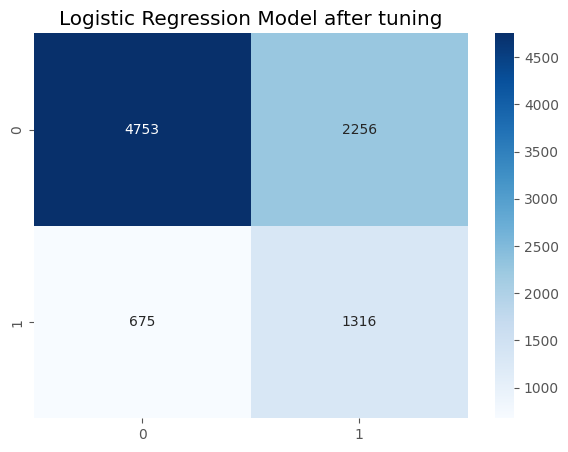

In [74]:
# Confusion matrix visualization of logistic regression

# Setting size
plt.figure(figsize=(7,5)) 

# Confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_tuned_logreg_clf), cmap='Blues', annot=True, fmt='.0f')
plt.title('Logistic Regression Model after tuning')
plt.show()

In [75]:
# Hyperparameter tuning KNN

# Benchmarck model 2
knn_clf = KNeighborsClassifier()

# cv
skfold = StratifiedKFold(n_splits = 5)

# Hyperparameter space of knn
hyperparam_space_knn_clf = [{
    'model__n_neighbors' : [3, 5, 7],
    'model__weights' : ['uniform', 'distance'],
    'model__metric' : ['euclidean', 'manhattan'],
}]

# Create the algorithm chains
estimator_knn_clf = Pipeline([
    ('outlier', handling_outliers()),
    ('transformer', transformer),
    ('scaler', scaler),
    ('resampler', smote), 
    ('model', knn_clf)
    ])

tuned_knn_clf = RandomizedSearchCV(
    estimator_knn_clf, 
    n_jobs=-1, 
    param_distributions=hyperparam_space_knn_clf,
    scoring='roc_auc',
    n_iter=200,
    cv=skfold, 
    random_state=0
    )
# fitting 
tuned_knn_clf.fit(X_train, y_train)

Lower Bounds:
 LIMIT_BAL    10000.00
AGE             22.00
BILL_AMT1      -73.04
BILL_AMT2     -163.04
BILL_AMT3     -163.10
BILL_AMT4     -200.00
BILL_AMT5     -218.04
BILL_AMT6     -304.03
PAY_AMT1         0.00
PAY_AMT2         0.00
PAY_AMT3         0.00
PAY_AMT4         0.00
PAY_AMT5         0.00
PAY_AMT6         0.00
Name: 0.01, dtype: float64
Upper Bounds:
 LIMIT_BAL    500000.00
AGE              60.00
BILL_AMT1    342302.18
BILL_AMT2    327255.78
BILL_AMT3    321100.41
BILL_AMT4    298380.76
BILL_AMT5    280916.12
BILL_AMT6    275628.44
PAY_AMT1      65140.75
PAY_AMT2      72360.16
PAY_AMT3      72053.80
PAY_AMT4      67702.93
PAY_AMT5      63758.46
PAY_AMT6      74984.16
Name: 0.99, dtype: float64


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('outlier', handling_outliers()),
                                             ('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['MARRIAGE',
                                                                                'EDUCATION']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6'])])),
                                             ('scaler', RobustScaler()),
                                             ('resampler',
                                              SMOTE(random_state=0)),
                                             ('model',
                                              KNeighborsClassifier())]),
                   n_iter=200, n_jobs=-1,
                   param_distributions=[{'model__metric': ['euclidean',
                                                           'manhattan'],
                                         'model__n_neighbors': [3, 5, 7],
                                         'model__weights': ['uniform',
                                                            'distance']}],
                   random_state=0, scoring='roc_auc')

In [76]:
# Best score from randomized_search
print(f'ROC AUC score pada train set: {tuned_knn_clf.best_score_:.3f}')

# Best parameter with best score from tuned knn
print(f'Best parameter: {tuned_knn_clf.best_params_}')

ROC AUC score pada train set: 0.702
Best parameter: {'model__weights': 'uniform', 'model__n_neighbors': 7, 'model__metric': 'euclidean'}


In [77]:
# Model after hyperparameter tuning
tuned_model_knn_clf = tuned_knn_clf.best_estimator_

# Fitting model
tuned_model_knn_clf.fit(X_train, y_train)

# Predict to test set
y_tuned_knn_clf = tuned_model_knn_clf.predict(X_test)

# Evaluate score on test set
roc_auc_score(y_test, y_tuned_knn_clf)

Lower Bounds:
 LIMIT_BAL    10000.00
AGE             22.00
BILL_AMT1      -73.04
BILL_AMT2     -163.04
BILL_AMT3     -163.10
BILL_AMT4     -200.00
BILL_AMT5     -218.04
BILL_AMT6     -304.03
PAY_AMT1         0.00
PAY_AMT2         0.00
PAY_AMT3         0.00
PAY_AMT4         0.00
PAY_AMT5         0.00
PAY_AMT6         0.00
Name: 0.01, dtype: float64
Upper Bounds:
 LIMIT_BAL    500000.00
AGE              60.00
BILL_AMT1    342302.18
BILL_AMT2    327255.78
BILL_AMT3    321100.41
BILL_AMT4    298380.76
BILL_AMT5    280916.12
BILL_AMT6    275628.44
PAY_AMT1      65140.75
PAY_AMT2      72360.16
PAY_AMT3      72053.80
PAY_AMT4      67702.93
PAY_AMT5      63758.46
PAY_AMT6      74984.16
Name: 0.99, dtype: float64


0.6541592968042308

In [78]:
print("The Classification Report of K_Nearest Neighbors Classifier")
print(classification_report(y_test, y_tuned_knn_clf))

The Classification Report of K_Nearest Neighbors Classifier
              precision    recall  f1-score   support

           0       0.87      0.65      0.75      7009
           1       0.35      0.65      0.46      1991

    accuracy                           0.65      9000
   macro avg       0.61      0.65      0.60      9000
weighted avg       0.75      0.65      0.68      9000



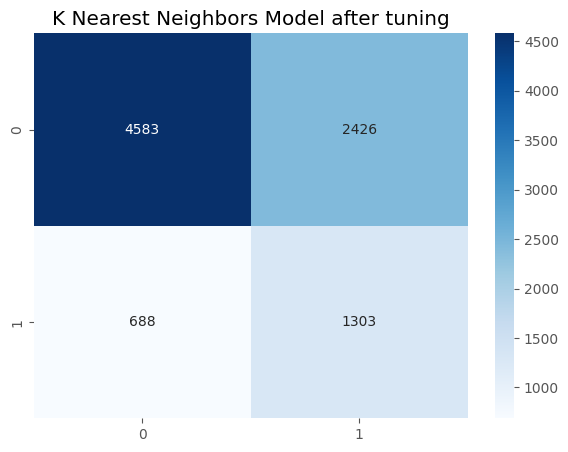

In [79]:
# Confusion matrix visualization of knn

# Setting size
plt.figure(figsize=(7,5)) 

# Confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_tuned_knn_clf), cmap='Blues', annot=True, fmt='.0f')
plt.title('K Nearest Neighbors Model after tuning')
plt.show()

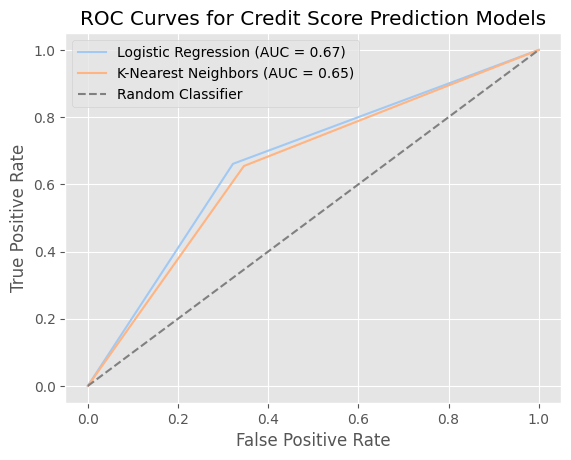

In [80]:
# ROC graph analysis

from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curves(y_test, y_tuned_knn_clf, y_tuned_logreg_clf):

    # calculate ROC curves for each model
    fpr_knn, tpr_knn, _ = roc_curve(y_test, y_tuned_knn_clf)
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_tuned_logreg_clf)

    # Calculate the AUC-ROC scores
    auc_knn = roc_auc_score(y_test, y_tuned_knn_clf)
    auc_logreg = roc_auc_score(y_test, y_tuned_logreg_clf)
    
    # Plot ROC curves
    plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
    plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {auc_knn:.2f})')
    
    # Plot random classifier
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Credit Score Prediction Models')
    plt.legend()
    plt.show()

plot_roc_curves(y_test, y_tuned_knn_clf, y_tuned_logreg_clf)